# H vs DT plots used in the paper using short and long equation 
**Following Holmes. et al 2009, the at Ts-Ta =0 H should be zero by forcing intercept**

In [1]:
from __future__ import division
from IPython.display import display
from sympy import diff, init_printing
init_printing() 
init_printing(use_latex='mathjax')
from sympy import diff, Eq, exp, init_printing, log, solve, sqrt
init_printing() 
from sympy.printing import StrPrinter
StrPrinter._print_Quantity = lambda self, expr: str(expr.abbrev)    # displays short units (m instead of meter)

In [2]:
# Using environmental science for symbolic math, see https://github.com/environmentalscience/essm
from essm.variables._core import BaseVariable, Variable
from essm.equations import Equation
from essm.equations.physics.thermodynamics import *
from essm.variables.units import derive_unit, SI, Quantity
from essm.variables.utils import replace_defaults, replace_variables
from sympy.physics.units import joule, kelvin,gram,kilogram,meter, mole, pascal, second
from essm.variables.utils import generate_metadata_table
from matplotlib import rc 
import matplotlib
import math
import sympy
from essm.variables.units import derive_unit, derive_baseunit, markdown, SI
from essm.variables.units import joule, kelvin, kilogram, meter, pascal, second, watt

from sympy import diff, Eq, exp, init_printing, log, solve, sqrt
import re


In [3]:
import numpy as np
from netCDF4 import Dataset
import netCDF4
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import sys
import xarray as xr
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error



In [4]:
import glob
from netCDF4 import Dataset
import os
from sympy.printing.theanocode import theano_function

## Plot Path :

In [5]:
plt_path= '../plots'


## Brookings

In [6]:
filename = '../Data/fluxnet/AMF_US-Bkg_BASE_HH_4-1.csv'
brookframe = pd.read_csv(filename, error_bad_lines=False,  na_values=-9999, skiprows= 2)
           

In [7]:
brookframerang = pd.date_range('1/1/2004 00:00', periods=len(brookframe.index), freq='30min')
brookframe.index = brookframerang
brookframe=brookframe.replace(-9999.000000, np.nan)
#brookframe

## Alice Spring:

In [10]:
AS = '../Data/tern/AS/' 
ASncfile = xr.open_mfdataset(AS +'/*.nc', combine='by_coords')#, combine='nested')

In [11]:
#ASncfile.info()

sitename = [ASncfile,HSncfile]
for site in sitename:
    canopy_height=site.canopy_height
    print(canopy_height)
#canopy_height=ASncfile.canopy_height
#print(canopy_height)
#'canopy_height_{0}'.format(str(sitename))=ASncfile.canopy_height
####
anopy_ht_as=ASncfile.canopy_height
can_ht=re.findall(r'\d*\.?\d+',canopy_ht_as)
can_ht=float(can_ht[0])
tower_ht=ASncfile.tower_height
wind_measure_ht = 9.25
humidi_measure_ht=11.25
k=0.667
d=(k*can_ht)
zom_as = 0.123 * can_ht
zoh_as=0.1*zom_as
print(zoh_as)

### dataframe

In [12]:
ASncfile.canopy_height

'6.5m'

In [13]:

asframe= ASncfile.to_dataframe()
asframe.index=asframe.index.set_names(['longitute','latitute','time'])#'latitute', 'longitute'
asframe.reset_index(inplace=True)
asframe.index=asframe.time 
asframe=asframe[(asframe.Ws_QCFlag==00)&(asframe.ustar_QCFlag==00)&(asframe.Fn_QCFlag==00)&(asframe.Ws_QCFlag==00)]
asframe=asframe.replace(-9999.000000, np.nan)
asframe["T_a"] = pd.Series(asframe.Ta + 273.15, index=asframe.index)


#asframe

In [14]:
#asframe.ustar

In [15]:
#df=asframe[(asframe.index.year == 2016) & (asframe.index.month == 1)&(asframe.Fn > 25)  & (asframe.Ws > 2)]
#print(df.ustar,df.Ws)

In [16]:
#print(aero_res_as.resample('M').median())

## Howard Spring

In [17]:
HS = '../Data/tern/HS/' 
HSncfile = xr.open_mfdataset(HS +'/*.nc',combine='by_coords')

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


In [18]:
#HSncfile.info()

### vdict Howards spring:

In [19]:
hsframe= HSncfile.to_dataframe()
hsframe.index=hsframe.index.set_names(['longitute','latitute','time'])#'latitute', 'longitute'
hsframe.reset_index(inplace=True)
hsframe.index=hsframe.time 
hsframe=hsframe[(hsframe.Ws_QCFlag==00)&(hsframe.ustar_QCFlag==00)&(hsframe.Fn_QCFlag==00)&(hsframe.Ws_QCFlag==00)]
hsframe=hsframe.replace(-9999.000000, np.nan)
hsframe["T_a"] = pd.Series(hsframe.Ta + 273.15, index=hsframe.index)




/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

In [20]:
#print(aero_res_hs.resample('M').median())

## Tumarumba:

In [21]:
Tum = '../Data/tern/TUM/' 
Tumncfile = xr.open_mfdataset(Tum+'/*.nc',combine='by_coords')

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


### Tum Vdict:

In [22]:
#Tumncfile.info()

In [23]:
tumframe= Tumncfile.to_dataframe()
tumframe.index=tumframe.index.set_names(['longitute','latitute','time'])#'latitute', 'longitute'
tumframe.reset_index(inplace=True)
tumframe.index=tumframe.time
tumframe=tumframe[(tumframe.Ws_QCFlag==00)&(tumframe.ustar_QCFlag==00)&(tumframe.Fn_QCFlag==00)]
tumframe=tumframe.replace(-9999.000000, np.nan)
tumframe["T_a"] = pd.Series(tumframe.Ta + 273.15, index=tumframe.index)



/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

## Sturt Plains:

In [24]:
SP = '../Data/tern/sturt_plains/'
Spncfile = xr.open_mfdataset(SP +'/*.nc', combine='by_coords' )

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

### sp vdict

In [25]:
spframe= Spncfile.to_dataframe()
can_ht_sp=Spncfile.canopy_height
spframe.index=spframe.index.set_names(['longitute','latitute','time'])#'latitute', 'longitute'
spframe.reset_index(inplace=True)
spframe.index=spframe.time
spframe=spframe[(spframe.Ws_QCFlag==00)&(spframe.ustar_QCFlag==00)&(spframe.Fn_QCFlag==00)]
spframe=spframe.replace(-9999.000000, np.nan)
spframe["T_a"] = pd.Series(spframe.Ta + 273.15, index=spframe.index)


/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

## Litchfield:

In [26]:
LF= '../Data/tern/litchfield/' 
LFncfile = xr.open_mfdataset(LF +'/*.nc')

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future defa

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

### vdict LF

In [27]:
lfframe= LFncfile.to_dataframe()
lfframe.index=lfframe.index.set_names(['longitute','latitute','time'])#'latitute', 'longitute'
lfframe.reset_index(inplace=True)
lfframe.index=lfframe.time
lfframe=lfframe[(lfframe.Ws_QCFlag==00)&(lfframe.ustar_QCFlag==00)&(lfframe.Fn_QCFlag==00)]
lfframe=lfframe.replace(-9999.000000, np.nan)
lfframe["T_a"] = pd.Series(lfframe.Ta + 273.15, index=lfframe.index)


/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/th

In [28]:
#df_lf

## adelaide River:

In [29]:
AR = '../Data/tern/AdelaideRiver/' 

ARncfile = xr.open_mfdataset(AR +'/*.nc')  #,combine='nested')


/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  This is separate from the ipykernel package so we can avoid doing imports until
/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/xarray/backends/api.py:941: FutureWarning: The datasets supplied do not have global dimension coordinates. In
future, to continue concatenating without supplying dimension
coordinates, please use the new `combine_nested` function (or the
`combine='nested'` option to open_mfdataset.
  from_openmfds=True,


### Vdict ar

In [30]:
arframe= ARncfile.to_dataframe()
arframe.index=arframe.index.set_names(['Time'])#'latitute', 'longitute'
arframe.reset_index(inplace=True)
arframe['timestamp']= pd.to_datetime(arframe[['Year' ,'Month','Day','Hour','Minute','Second']])
arframe.index=arframe.timestamp
arframe=arframe[(arframe.Ws_CSAT_QCFlag==00)&(arframe.ustar_QCFlag==00)&(arframe.Fn_QCFlag==00)]
arframe=arframe.replace(-9999.000000, np.nan)
arframe["T_a"] = pd.Series(arframe.Ta + 273.15, index=arframe.index)


In [31]:
#df_ar.index

## variable def:

In [32]:
class epsilon (Variable):
    """emissivity """ 
    unit = 1 
    latex_name ='\epsilon'
    #default = 0.9

        
class sigma (Variable):
    """ stefan-boltzmann constant""" 
    unit =  watt/(meter**2 * kelvin**4)
    latex_name ='\sigma'
    default = 5.6704 * 10**-8


class T_s(Variable): 
    """Effective surface temperature.""" 
    unit = kelvin 
    latex_name ='T_{s}'
       
    
class T_a(Variable): 
    """Air temperature""" 
    unit = kelvin 
    latex_name ='T_a'   
 
    
class R_lout(Variable): 
    """upwelling longwave""" 
    unit = watt/meter**2
    latex_name ='R_{l,out}'
    #default = Hs.longwave_up
    
    
class H(Variable): 
    """sensible heat""" 
    unit = watt/meter**2
    latex_name ='H'
    
class delta_T(Variable): 
    """difference in surface and air temperature""" 
    unit = kelvin 
    latex_name ='\Delta T'

    

/home/thakur_21505/.conda/envs/essm/lib/python3.6/site-packages/essm/variables/_core.py:89: UserWarning: "essm.variables.physics.thermodynamics:T_a" will be overridden by "__main__:<class '__main__.T_a'>"
  instance[expr] = instance


In [33]:
# calculation of Ts considering both eitted and reflected radiation(Mike)
class R_lin(Variable):
    """Incoming Longwave radiation"""
    latex_name = r'R_{l,in}'
    unit = watt/meter**2
class eq_Rlout_Rlin(Equation):
    """Upwelling longwave radiation including reflected."""
    expr = Eq(R_lout, sigma*epsilon*T_s**4 + (1-epsilon) * R_lin)
eq_Rlout_Rlin

In [34]:
class eq_Ts_Rlout_Rlin(eq_Rlout_Rlin.definition):
    """Surface temperature as a function of LWout and LWin"""
    soln = solve(eq_Rlout_Rlin, T_s, dict=True)
    expr = Eq(T_s, soln[3][T_s])
eq_Ts_Rlout_Rlin

### SEQ

In [35]:
class eq_Rlout(Equation):
    """Upwelling longwave radiation."""
    expr = Eq(R_lout, sigma*epsilon*T_s**4)
eq_Rlout


In [36]:
class eq_Ts_Rlout(eq_Rlout.definition):
    """Surface temperature as a function of LWout"""
    soln = solve(eq_Rlout, T_s, dict=True)
    expr = Eq(T_s, soln[3][T_s])
eq_Ts_Rlout

# Plot-scale epsilon using LEQ:

### function

In [37]:

def opteps_RLM (years, df_all,mnth,xcol = 'DT', ycol = 'Fh', eqdigits=3):
    opteps_rlm = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])
    k=0
    epsilon1=np.arange(0.4,1,0.005).tolist() # using array of the epsilon values
    df = df_all[(df_all.index.year == years) & (df_all.index.month == mnth)& 
                (df_all.Fn > 25) & (df_all.Ws > 2)]
    
    
    for j in range(len(epsilon1)) :
        tf_T_s = theano_function([R_lin, R_lout], [eq_Ts_Rlout_Rlin.rhs.subs(epsilon, epsilon1[j]).
                                                          subs(Variable.__defaults__)], dims={R_lin:1, R_lout:1})
                                                       
        
        
        tf_T_s2 = theano_function([R_lin, R_lout], [eq_Ts_Rlout_Rlin.rhs.subs(epsilon, epsilon1[j]).
                                                          subs(Variable.__defaults__)], dims={R_lin:1, R_lout:1})
        
        list_T_s = tf_T_s(df.Fld,df.Flu)
        df = df.assign(T_s=list_T_s)
        list_H = df.Fh
        list_DT = df.T_s - df.T_a
        df = df.assign(DT=(df.T_s - df.T_a)) 
        
        try:
            
            df1 = df.dropna(subset=[xcol, ycol])# for removing nan values
            xdata1 = df1[xcol]
            ydata1 = df1[ycol]
            x=np.array(xdata1)
            y=np.array(ydata1)
            x=x.reshape(-1,1)
            y=y.reshape(-1,1)
            reg=LinearRegression(fit_intercept=False).fit(x, y) ## 2d x
        except ValueError: 
            
            r2=0                  ## for months having no data
        else:
            m=float(reg.coef_)
            c= float(reg.intercept_)
            y_pred = m*x+c
            N=len(y)
            MSE= mean_squared_error(y,y_pred)
            RMSE=float(sqrt(MSE))
            r2=r2_score(y,y_pred)
    
        if r2 > 0.5:
            opteps_rlm.loc[k]=[RMSE, m, epsilon1[j], r2]
        else:
            opteps_rlm.loc[k]=[np.nan, np.nan, 1, r2]
        k=k+1
        
        
        
    df_eps_ref=opteps_rlm.copy()## copying data frame for sorting based on minimum rmse
    
    df_eps_ref.sort_values(by=['RMSE'],ascending=True,inplace=True)
    
    return(df_eps_ref.eps_ref.iloc[0],df_eps_ref.m.iloc[0])
        
            

In [38]:
opteps_RLM (2016, spframe,6)

In [39]:
def opteps_monthly (site,years, df_all,mnth,epsilon1,xcol = 'DT', ycol = 'Fh', eqdigits=3):
    
   
    df = df_all[(df_all.index.year == years)& (df_all.index.month == mnth) 
                & (df_all.Fn > 25) & (df_all.Ws > 2)]
   
   
    tf_T_s = theano_function([R_lin, R_lout], [eq_Ts_Rlout_Rlin.rhs.subs(epsilon, epsilon1).
                                                          subs(Variable.__defaults__)], dims={R_lin:1, R_lout:1})
                                                       
        
        
    tf_T_s2 = theano_function([R_lin, R_lout], [eq_Ts_Rlout_Rlin.rhs.subs(epsilon, epsilon1).
                                                          subs(Variable.__defaults__)], dims={R_lin:1, R_lout:1})
        
        
        
    list_T_s = tf_T_s(df.Fld,df.Flu)
    df = df.assign(T_s=list_T_s)
    list_H = df.Fh
    list_DT = df.T_s - df.T_a
    df = df.assign(DT=(df.T_s - df.T_a))
        ####
    df1 = df.dropna(subset=[xcol, ycol])# for removing nan values
    xdata1 = df1[xcol]
    ydata1 = df1[ycol]
    x=np.array(xdata1)
    y=np.array(ydata1)
    x=x.reshape(-1,1)
    y=y.reshape(-1,1)
    #####
    reg=LinearRegression(fit_intercept=False).fit(x, y) ## 2d x
    m=float(reg.coef_)
    c=float(reg.intercept_)
    y_pred = m*x + c
    N=len(y)
    MSE= mean_squared_error(y,y_pred)
    RMSE=float(sqrt(MSE))
    print(RMSE)
    r2=r2_score(y,y_pred)
    legendtext = 'y=m x \nm={0}\n'r'R$^2$={1}''\nRMSE={2}\nN={3}'.format(str(np.round(m,decimals=eqdigits)),
                                                                  str(np.round(r2,decimals=eqdigits)),
                                                                  str(np.round(RMSE, decimals=eqdigits)),
                                                                  str(np.round(N, decimals=eqdigits)))

        
        
        
    plt.plot(x,y,"+",label='_nolegend_')
    plt.plot(x,y_pred, color='red',label=legendtext)# predicted
    plt.xlabel(r'$T_{leq} - T_{a} (K)$', ha='center',fontsize=20)
    plt.ylabel(r'$H (W m^{-2})$', labelpad=10, va='center',fontsize=20)
    plt.title('{0},{1}, $\epsilon$={2}'.format(str(site),df.index[0].date().strftime('%Y/%m'), 
                                          str(np.round(epsilon1,decimals=3))),fontsize=20)
    
    plt.xticks([-5,0,5,10,15],fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlim(-5, 17)
    plt.ylim(-50, 500)
    plt.legend(loc="best",fontsize=12)
    plt.grid()
    plt.show()
    print(RMSE) 
        
    

35.816126627637715


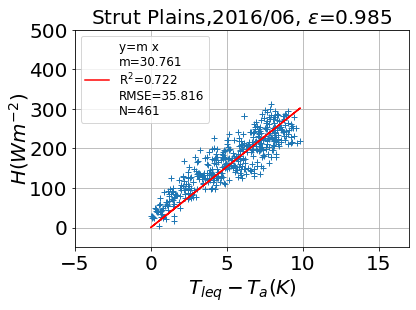

35.816126627637715


In [40]:
opteps_monthly ("Strut Plains",2016, spframe,6,0.985)

## Sturt Plains rahm

27.438408251713305


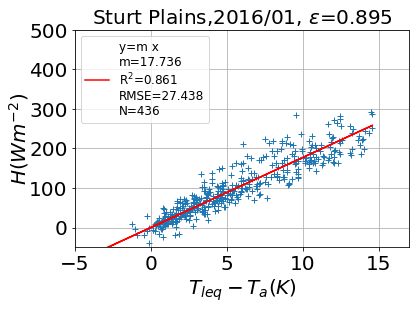

27.438408251713305
19.895965491901645


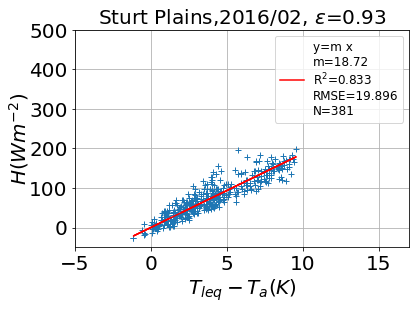

19.895965491901645
26.92391976957092


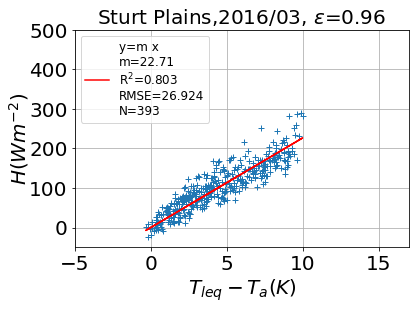

26.92391976957092
34.19786308474639


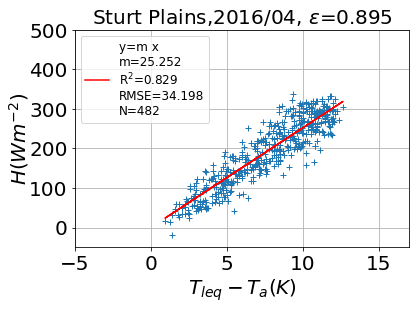

34.19786308474639
30.465987545027648


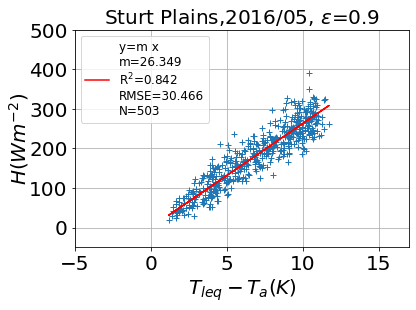

30.465987545027648
32.846450731035134


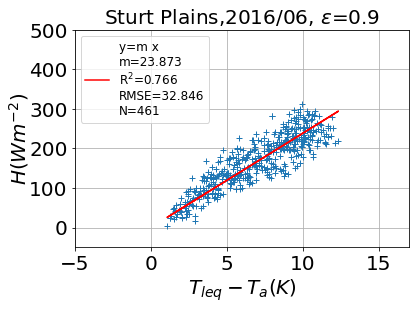

32.846450731035134
30.61351185881432


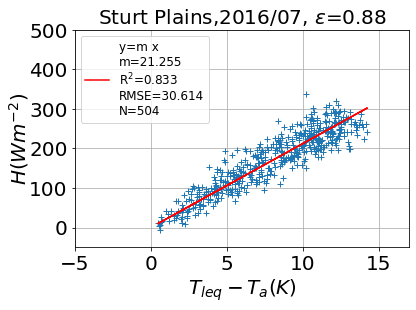

30.61351185881432
31.84548840705439


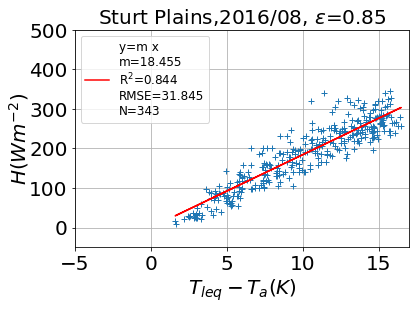

31.84548840705439
34.24326711286687


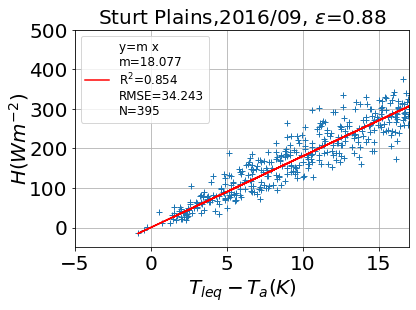

34.24326711286687
44.090790906060725


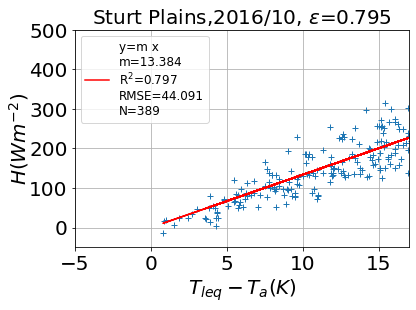

44.090790906060725
33.31168174534244


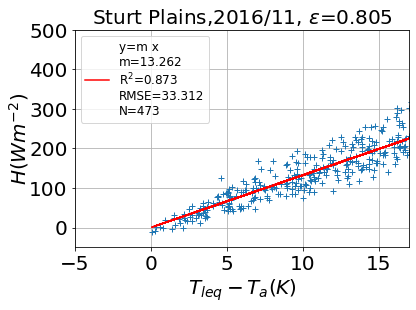

33.31168174534244
39.4702466523033


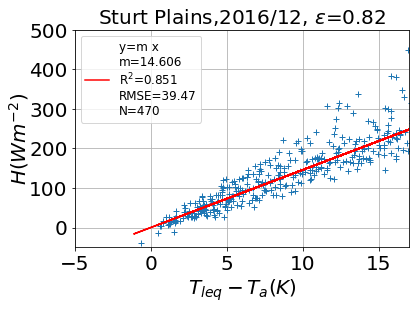

39.4702466523033
13.594873271115285


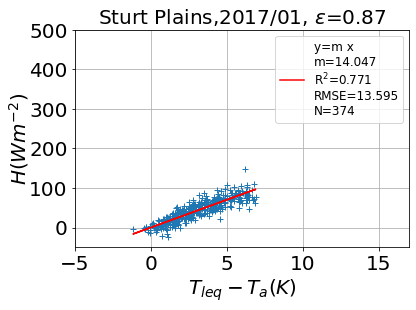

13.594873271115285
18.67044325077895


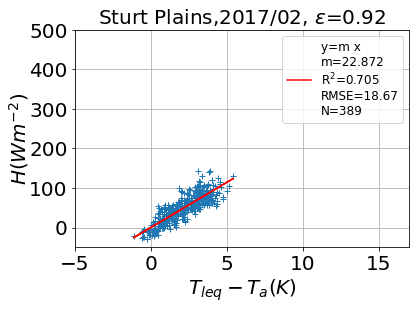

18.67044325077895
21.357231394293443


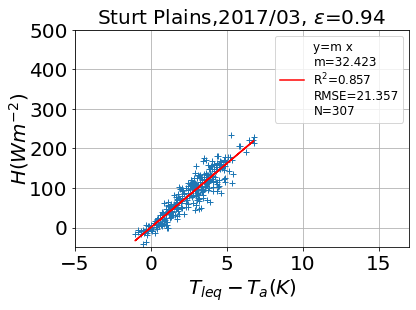

21.357231394293443
30.188911627514862


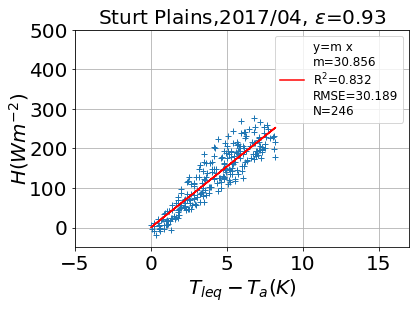

30.188911627514862
33.2043334922183


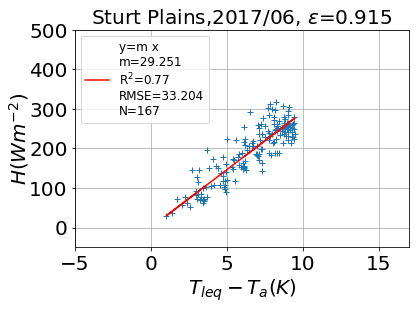

33.2043334922183
29.77838493305902


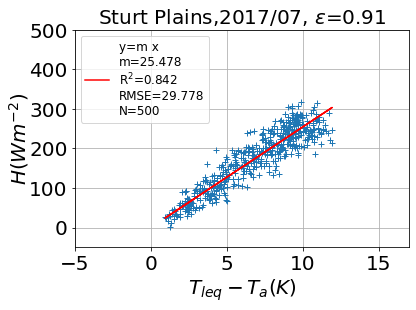

29.77838493305902
33.60568733897195


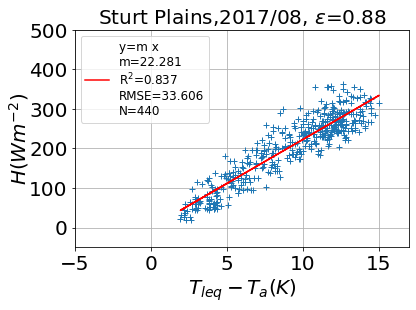

33.60568733897195
32.26236368059993


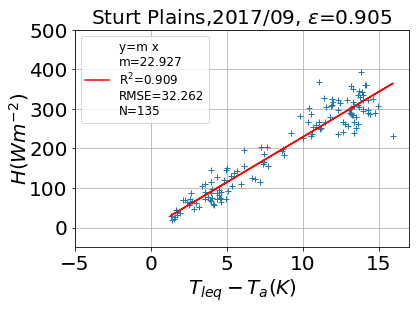

32.26236368059993
38.20050586540638


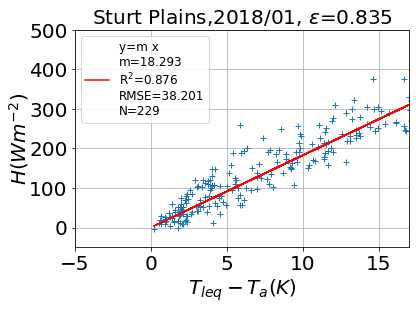

38.20050586540638
28.872100122340427


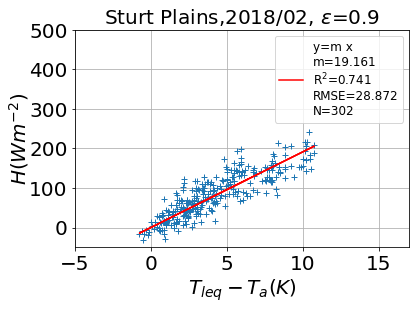

28.872100122340427
34.198376829643635


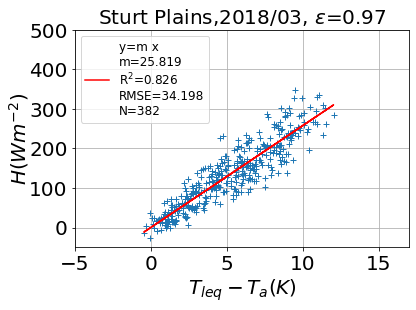

34.198376829643635
32.38977386416403


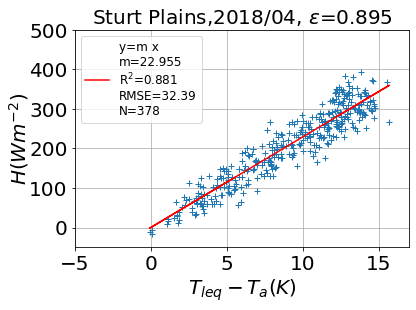

32.38977386416403
32.73938845489234


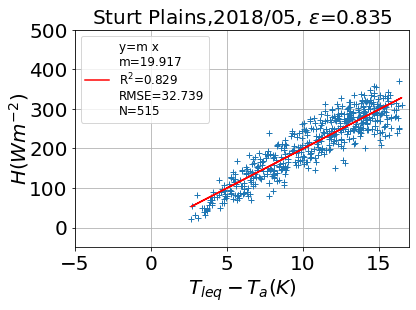

32.73938845489234
31.07397516780939


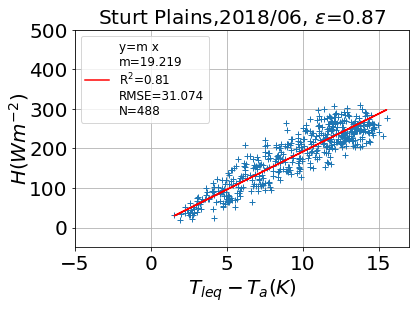

31.07397516780939
35.47097856374367


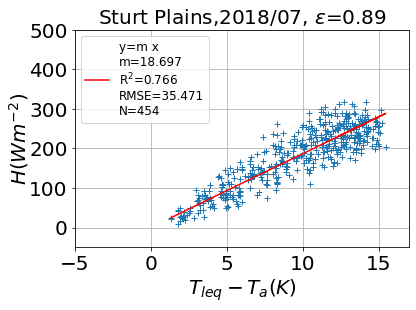

35.47097856374367
39.06101448360037


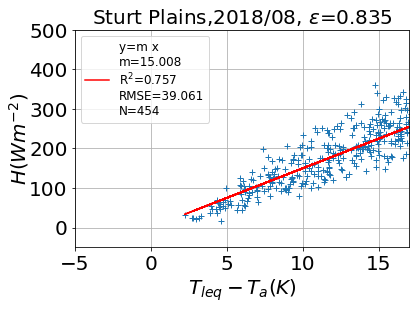

39.06101448360037
40.96625081231547


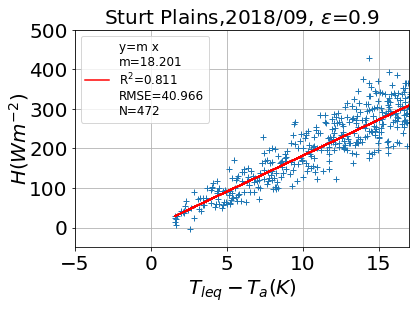

40.96625081231547
42.08842729891694


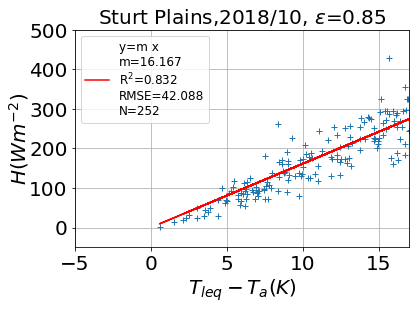

42.08842729891694
33.73156541587349


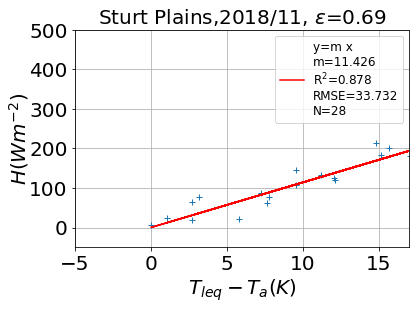

33.73156541587349
42.54985534132807


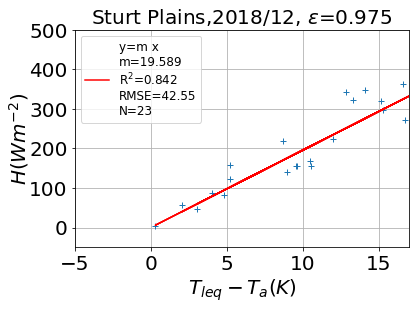

42.54985534132807


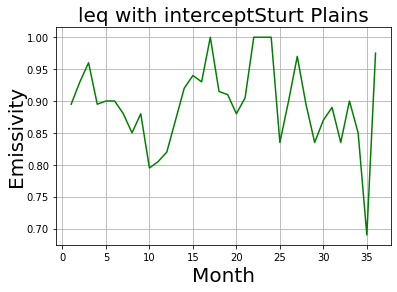

In [41]:
site="Sturt Plains"
df=spframe.copy()
mnth=0                              #8,9,10,11,12
eqdigits=3
list_opteps_sp=[]
list_slope_sp=[]
for yr in range(2016,2019):
    
    for i in range(12):
        mnth=i+1
        opteps_sp_ref = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])
        loop_result=opteps_RLM (yr,df,mnth)
        opt_eps=loop_result[0]
        slope=loop_result[1]
        if opt_eps < 1:
            list_opteps_sp.append(opt_eps)
            list_slope_sp.append(slope)
            opteps_monthly(site,yr,df,mnth,opt_eps)
        else:
            list_opteps_sp.append(1)
            list_slope_sp.append(np.nan)

plt.plot(np.arange(len(list_opteps_sp))+1,list_opteps_sp,color= 'green')
plt.xlabel('Month', ha='center',fontsize=20)
plt.ylabel('Emissivity', labelpad=10, va='center',fontsize=20)
plottitle = 'leq with intercept{0}'.format(str(site))
fname = 'Leq_intercept{0}'.format(str(site))
plt.title(plottitle, fontsize=20)
plt.grid()
#plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

## Alice spring

57.03369864206518


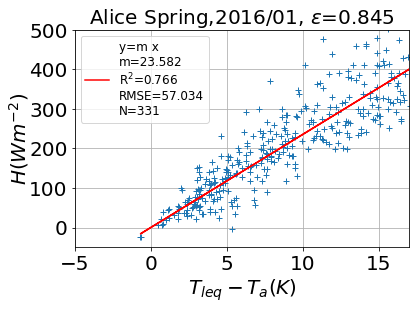

57.03369864206518
52.03529040663955


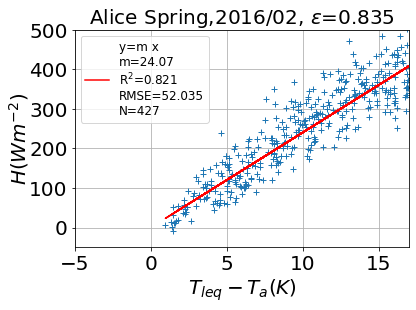

52.03529040663955
54.47380489119729


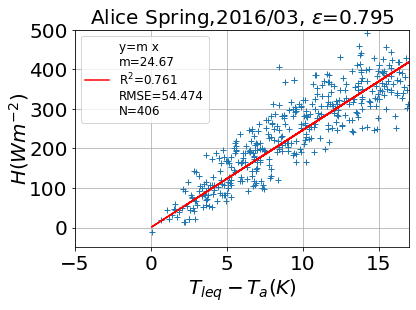

54.47380489119729
43.825576847707644


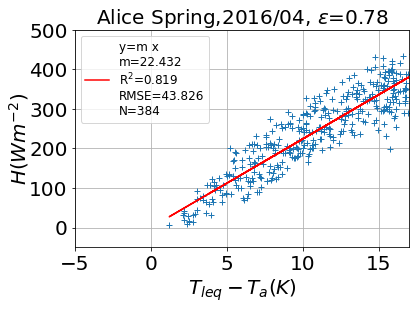

43.825576847707644
40.588112500844595


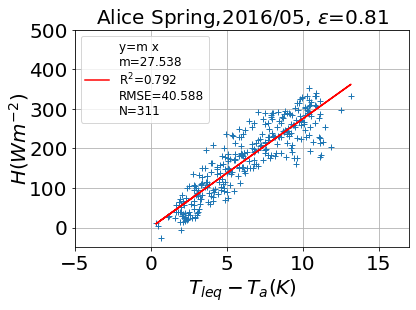

40.588112500844595
37.43008510489897


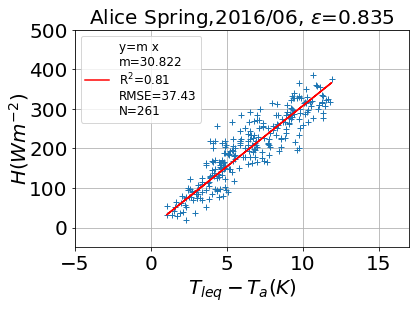

37.43008510489897
39.25677274373323


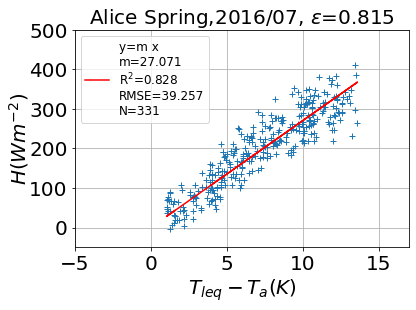

39.25677274373323
46.139641070468194


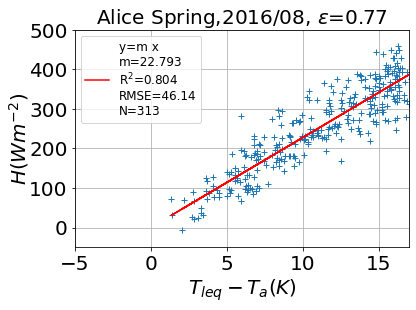

46.139641070468194
44.13171030808857


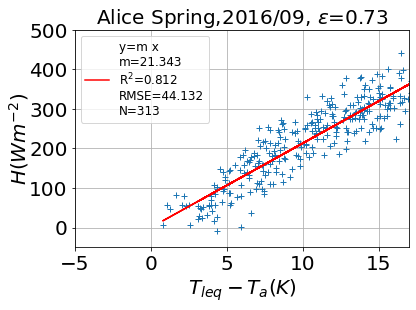

44.13171030808857
56.3722669911853


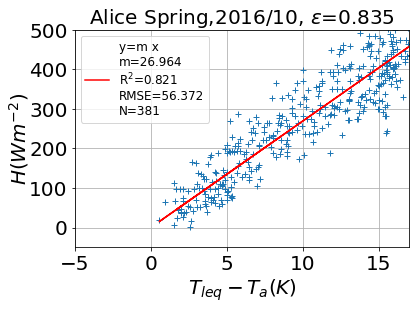

56.3722669911853
55.578779218832395


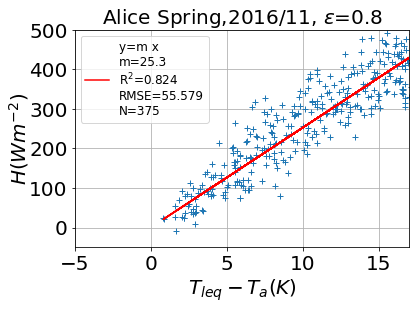

55.578779218832395
64.6264026880254


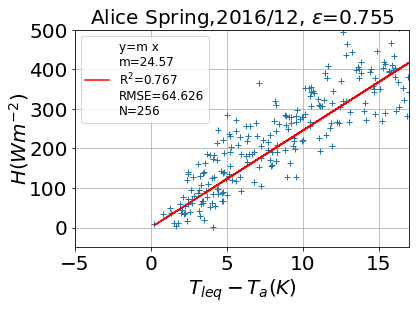

64.6264026880254
52.35824368360292


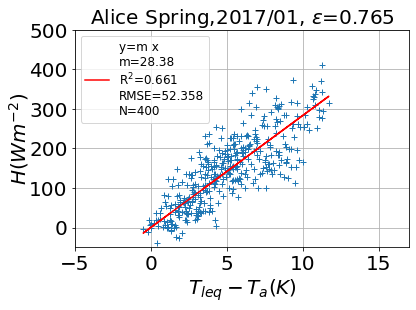

52.35824368360292
44.51828293660146


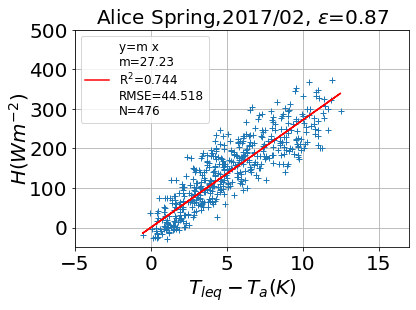

44.51828293660146
43.6282243856318


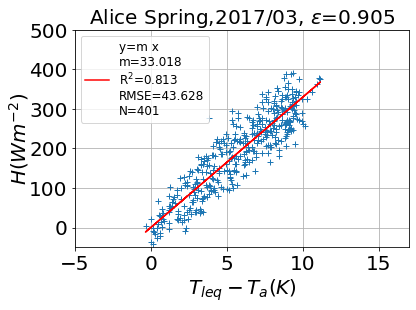

43.6282243856318
48.78975373879458


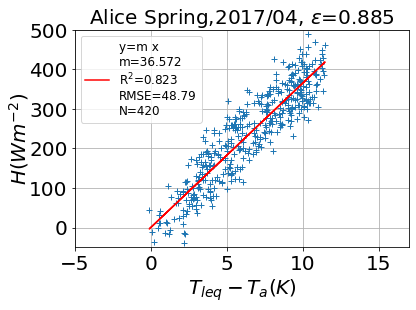

48.78975373879458
47.116909302453564


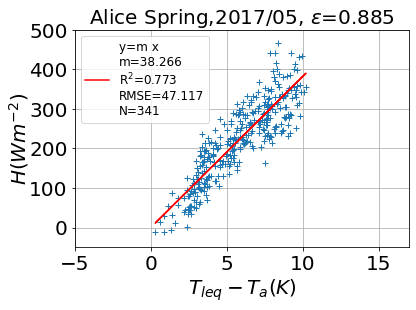

47.116909302453564
42.13080224930877


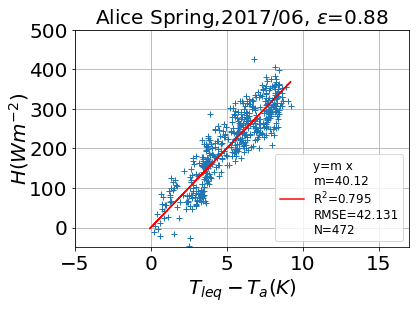

42.13080224930877
39.10437504811475


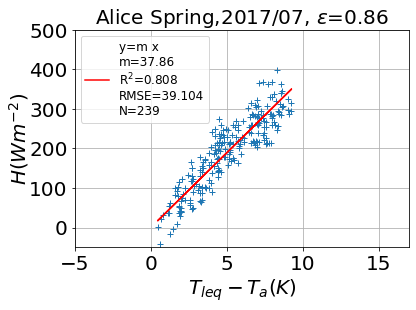

39.10437504811475
40.87869085262991


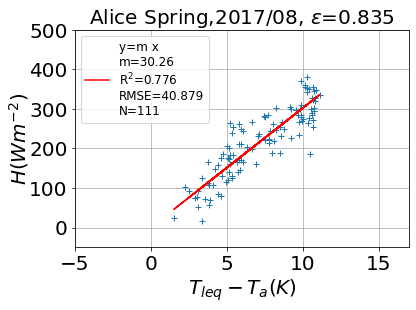

40.87869085262991
53.39672855297969


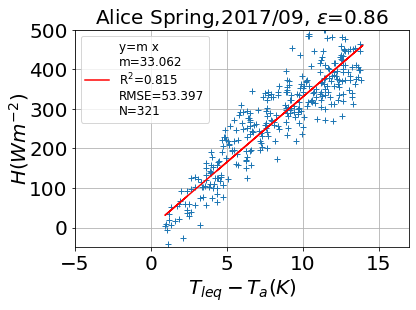

53.39672855297969
67.98505850872291


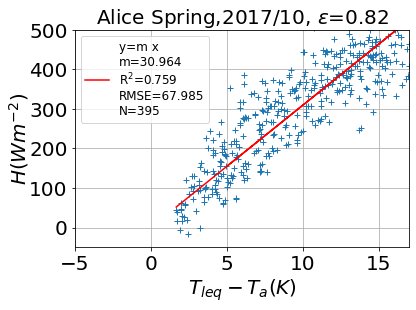

67.98505850872291
58.625651197647166


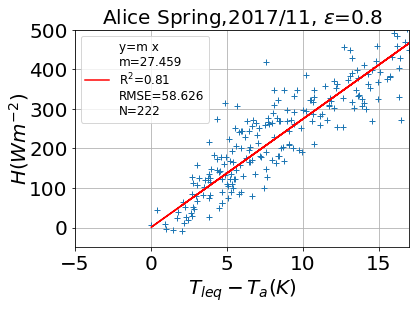

58.625651197647166
58.695188549657054


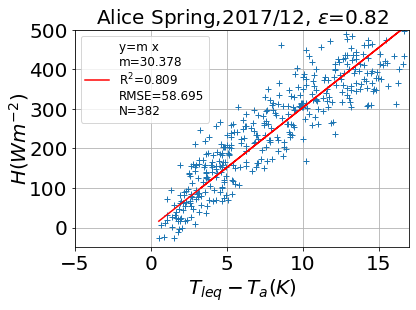

58.695188549657054
64.64695870782488


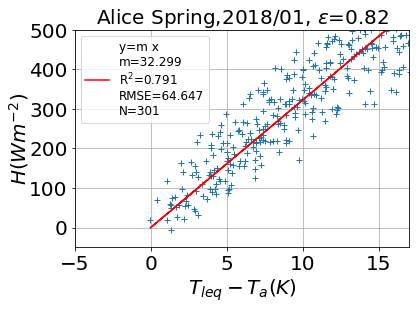

64.64695870782488
64.01231378783115


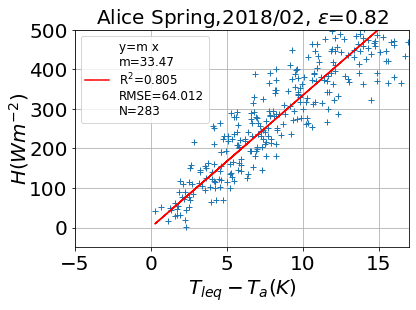

64.01231378783115
59.46152389392798


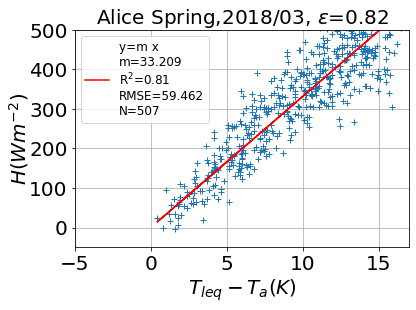

59.46152389392798
53.10523598470166


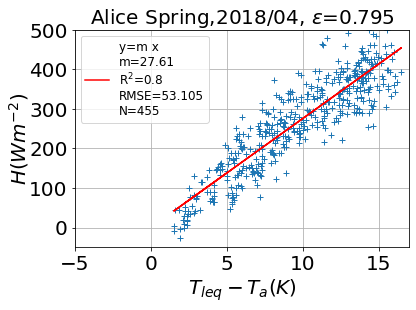

53.10523598470166
48.77206471648945


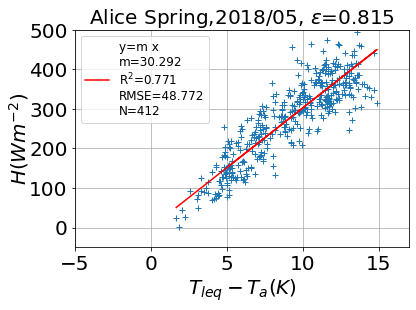

48.77206471648945
45.05107575257689


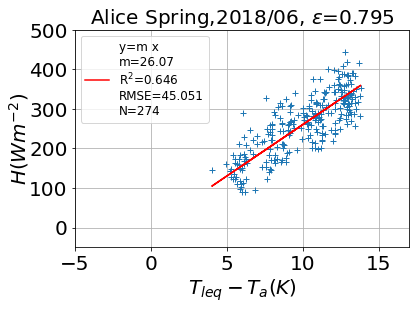

45.05107575257689
45.9574352169325


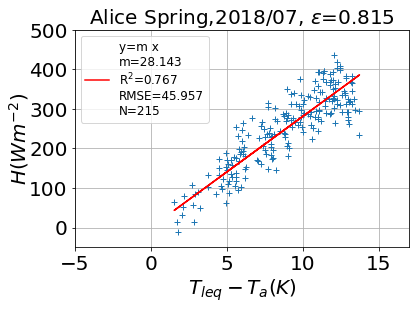

45.9574352169325
55.261754730645166


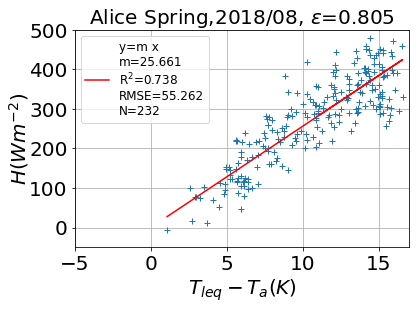

55.261754730645166
60.713889621847024


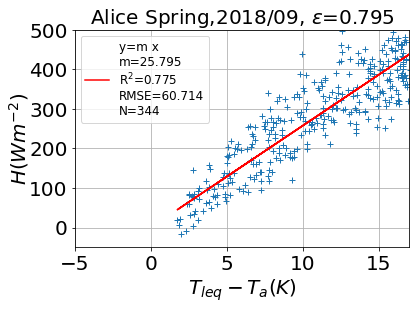

60.713889621847024
56.75260962004582


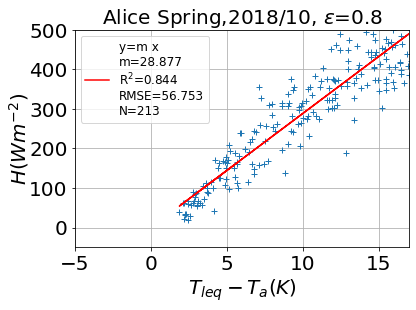

56.75260962004582
56.55140302647348


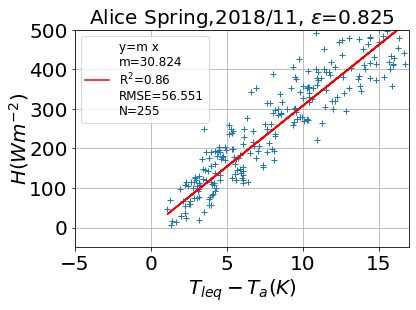

56.55140302647348
61.095829638824675


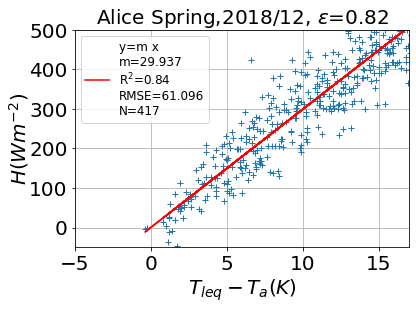

61.095829638824675


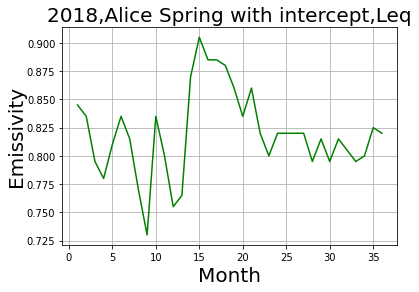

In [42]:
site="Alice Spring"
df=asframe.copy()
mnth=0                              #8,9,10,11,12
eqdigits=3
list_opteps_as=[]
list_slope_as=[]
for yr in range(2016,2019):
    
    for i in range(12):
        mnth=i+1
        opteps_sp_ref = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])
        loop_result=opteps_RLM (yr,df,mnth)
        opt_eps=loop_result[0]
        slope=loop_result[1]
        if opt_eps < 1:
            list_opteps_as.append(opt_eps)
            list_slope_as.append(slope)
            opteps_monthly(site,yr,df,mnth,opt_eps)
        else:
            list_opteps_as.append(np.nan)
            list_slope_as.append(np.nan)

eps_as=np.array(list_opteps_as)## converting into array
eps_as=eps_as[~np.isnan(eps_as)]## removing nan
plt.plot(np.arange(len(eps_as))+1,eps_as[~np.isnan(eps_as)],color= 'green')
plt.xlabel('Month', ha='center',fontsize=20)
plt.ylabel('Emissivity', labelpad=10, va='center',fontsize=20)
plottitle = '{0},Alice Spring with intercept,Leq'.format(str(np.round(yr)))
fname = 'as_Leq_intercept{0}'.format(str(np.round(yr)))
plt.title(plottitle,fontsize=20)
plt.grid()
plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')

plt.show()

### Howard Spring:

71.38255389777214


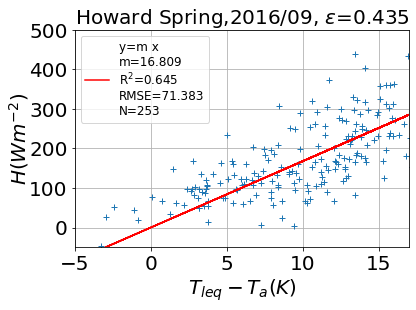

71.38255389777214
69.69979381287001


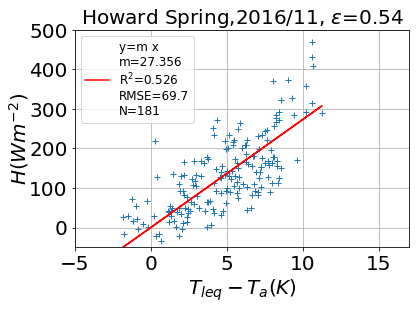

69.69979381287001
51.14479780572123


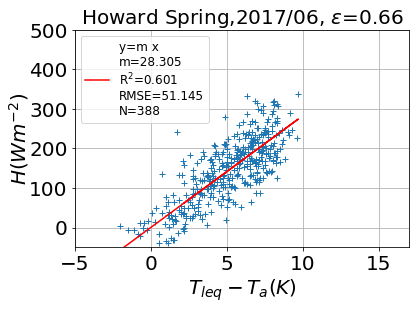

51.14479780572123
69.97172047635334


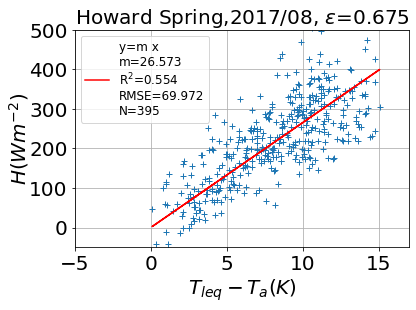

69.97172047635334
83.74286224650403


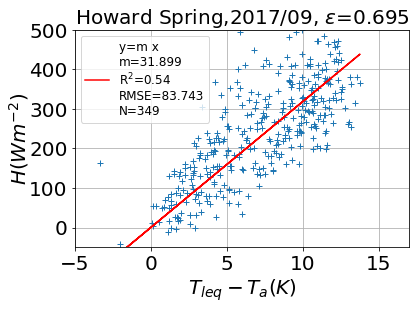

83.74286224650403
68.26143858460753


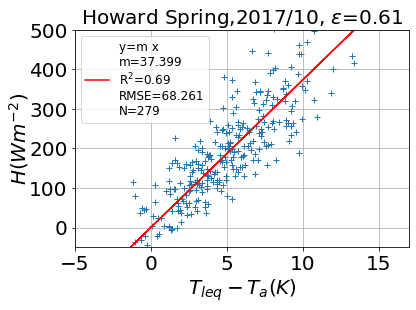

68.26143858460753
60.420084735213294


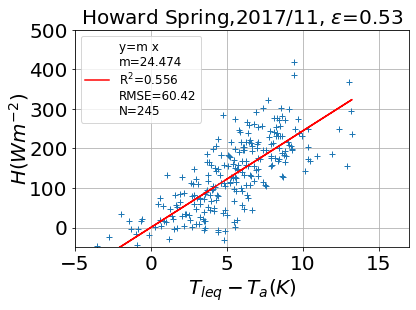

60.420084735213294
65.3150979967999


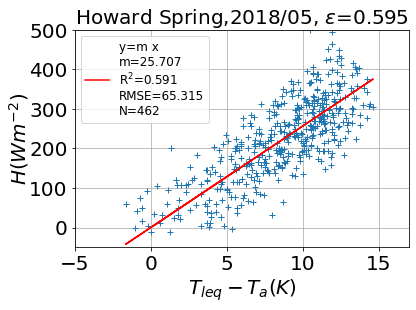

65.3150979967999
65.15872868198713


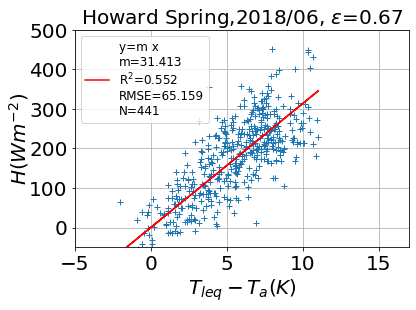

65.15872868198713
68.21665462337674


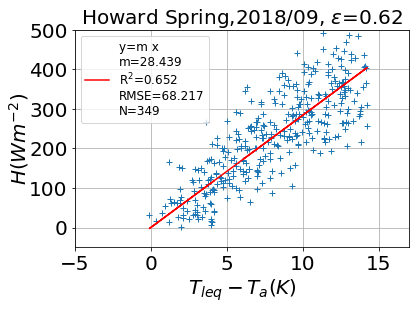

68.21665462337674
82.80771976728487


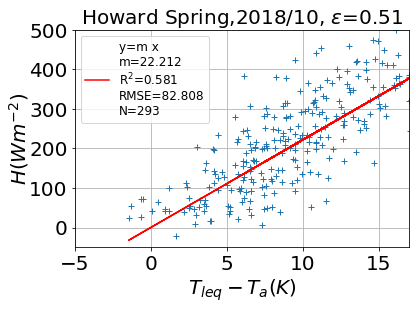

82.80771976728487
74.40979278599168


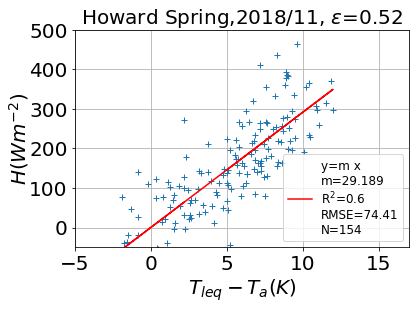

74.40979278599168
48.35824582290533


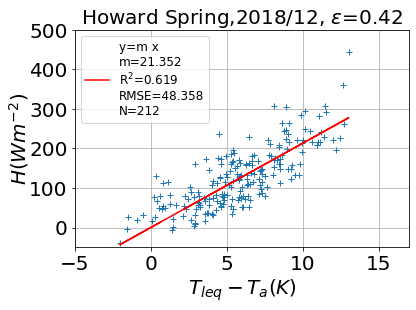

48.35824582290533


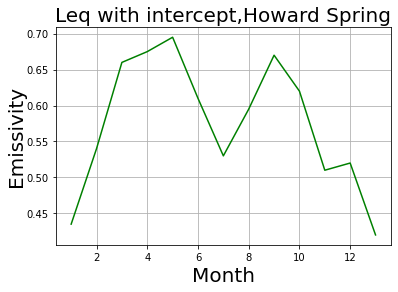

In [43]:
site="Howard Spring"
df=hsframe.copy()
mnth=0                              #8,9,10,11,12
eqdigits=3
list_opteps_hs=[]
list_slope_hs=[]
for yr in range(2016,2019):
    
    for i in range(12):
        mnth=i+1
        opteps_sp_ref = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])
        loop_result=opteps_RLM (yr,df,mnth)
        opt_eps=loop_result[0]
        slope=loop_result[1]
        if opt_eps < 1:
            list_opteps_hs.append(opt_eps)
            list_slope_hs.append(slope)
            opteps_monthly(site,yr,df,mnth,opt_eps)
        else:
            list_opteps_hs.append(np.nan)
            list_slope_hs.append(np.nan)

eps_hs=np.array(list_opteps_hs)## converting into array
eps_hs=eps_hs[~np.isnan(eps_hs)]## removing nan
plt.plot(np.arange(len(eps_hs))+1,eps_hs[~np.isnan(eps_hs)],color= 'green')
plt.xlabel('Month', ha='center',fontsize=20)
plt.ylabel('Emissivity', labelpad=10, va='center',fontsize=20)
plottitle = 'Leq with intercept,{0}'.format(str(site))
#fname = 'as_Leq_intercept{0}'.format(str(np.round(yr)))
plt.title(plottitle, fontsize=20)
plt.grid()
#plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

## Tumbarumba:

57.40073133272284


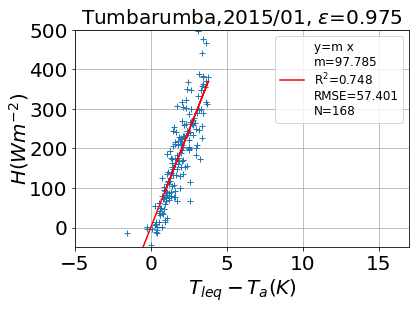

57.40073133272284
58.35338485995931


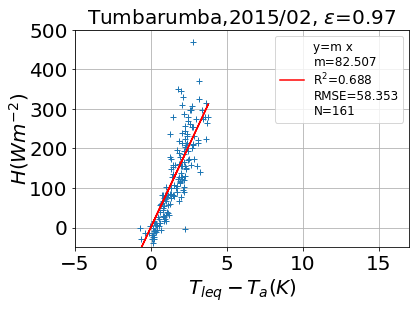

58.35338485995931
49.11634950112942


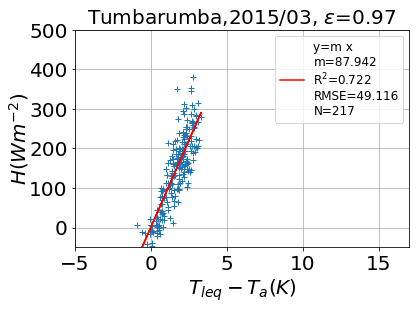

49.11634950112942
60.359016680192035


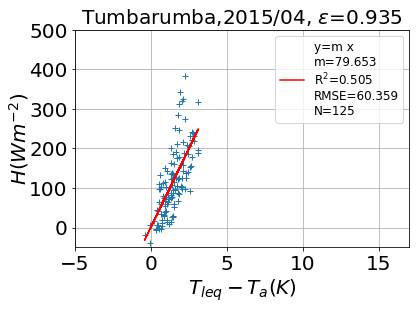

60.359016680192035
54.05427547698068


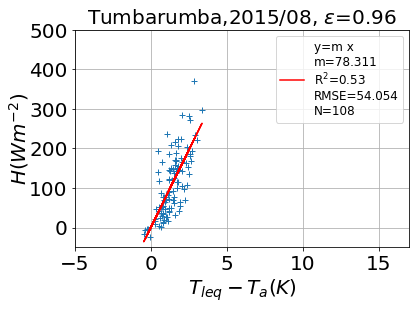

54.05427547698068
50.161590221185854


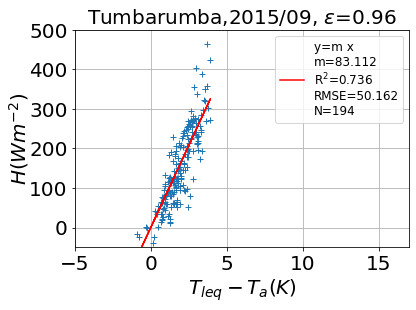

50.161590221185854
54.48774755110236


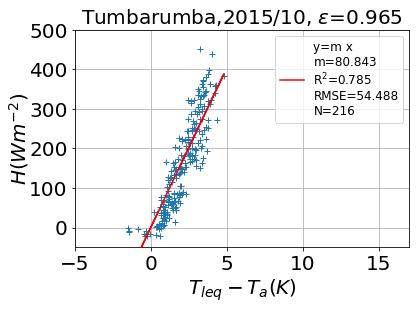

54.48774755110236
59.808836149385726


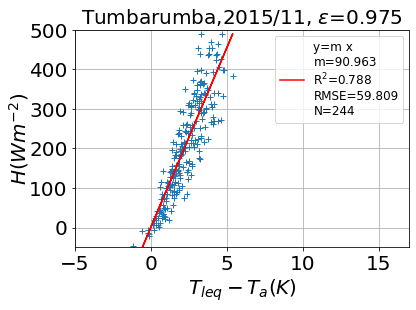

59.808836149385726
57.74227170947672


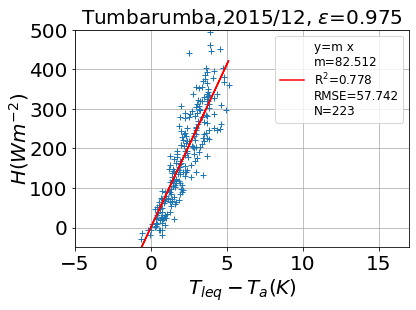

57.74227170947672
56.23644718081142


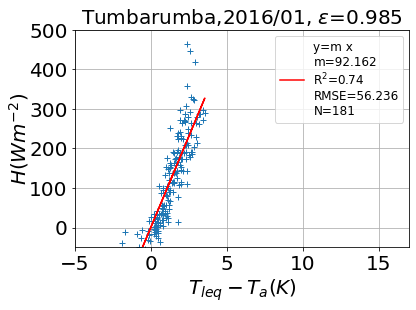

56.23644718081142
48.34166063916921


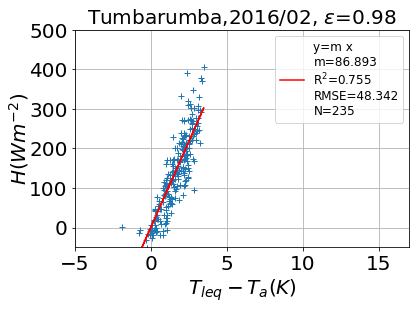

48.34166063916921
42.35601699092396


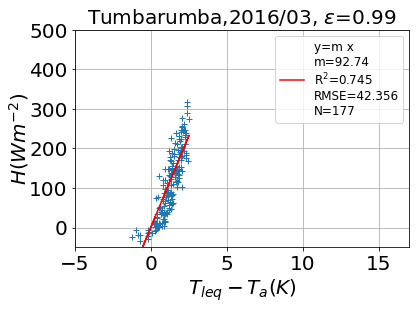

42.35601699092396
42.37271653025435


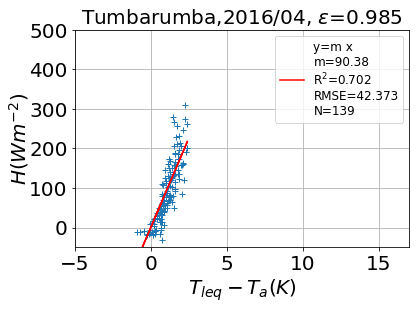

42.37271653025435
48.69747173966488


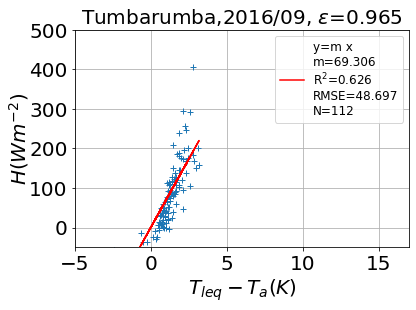

48.69747173966488
60.39835028018159


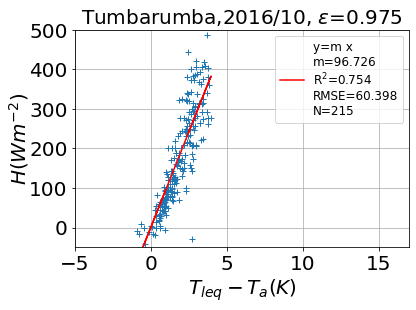

60.39835028018159
64.68811119112458


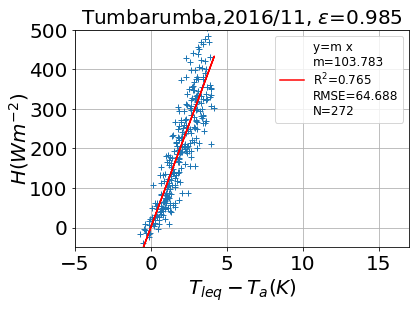

64.68811119112458
55.81414818200929


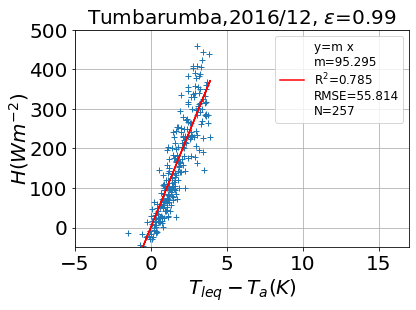

55.81414818200929
56.99131336314175


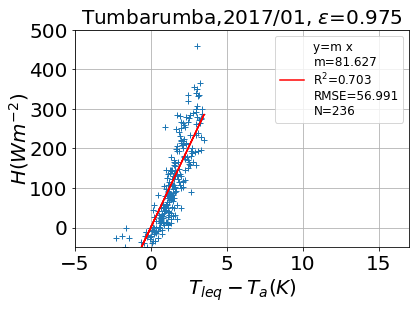

56.99131336314175
61.138314737923785


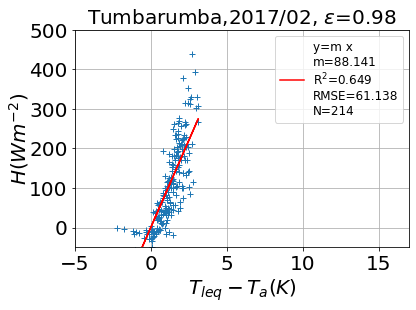

61.138314737923785
51.71399532905417


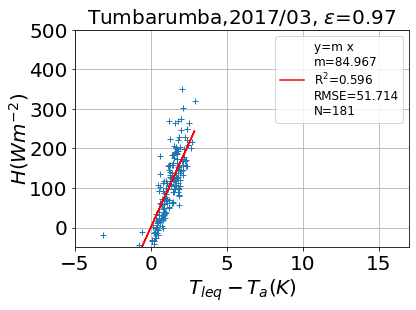

51.71399532905417
47.03510634450672


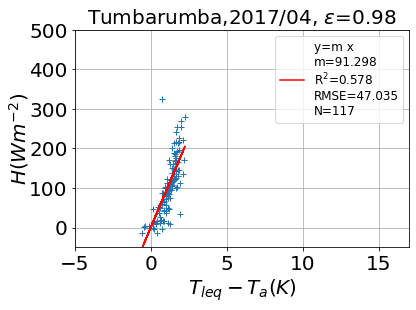

47.03510634450672
33.41191997271543


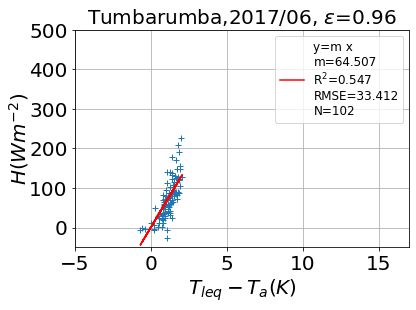

33.41191997271543
33.94740505878637


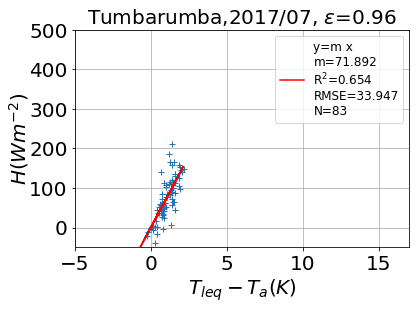

33.94740505878637
61.38432491202572


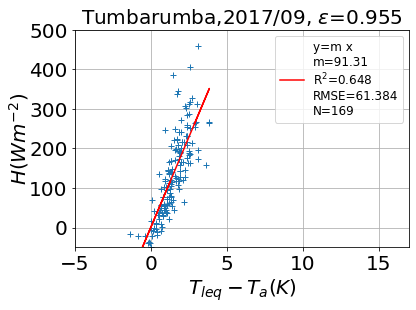

61.38432491202572
53.39463100769019


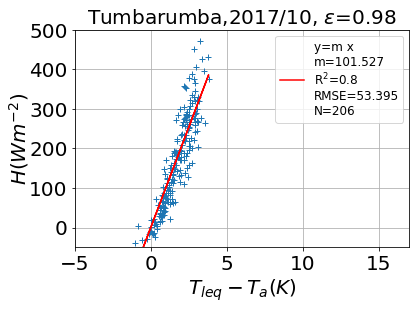

53.39463100769019
54.43589535439672


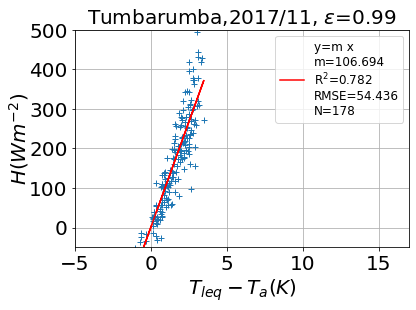

54.43589535439672
56.92930214464707


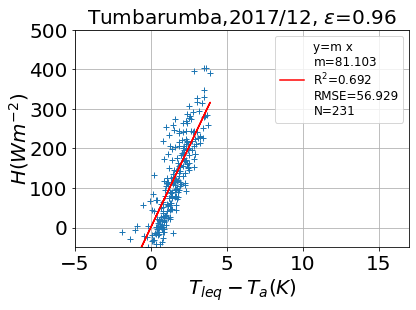

56.92930214464707


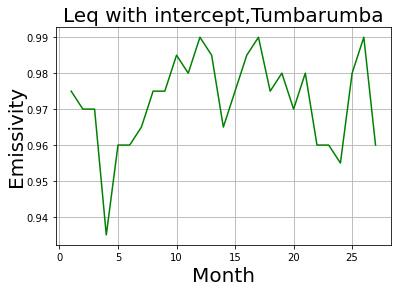

In [44]:
site="Tumbarumba"
df=tumframe.copy()
mnth=0                             
eqdigits=3
list_opteps_tum=[]
list_slope_tum=[]
for yr in range(2015,2018):
    
    for i in range(12):
        mnth=i+1
        opteps_sp_ref = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])
        loop_result=opteps_RLM (yr,df,mnth)
        opt_eps=loop_result[0]
        slope=loop_result[1]
        if opt_eps < 1:
            list_opteps_tum.append(opt_eps)
            list_slope_tum.append(slope)
            opteps_monthly(site,yr,df,mnth,opt_eps)
        else:
            list_opteps_tum.append(np.nan)
            list_slope_tum.append(np.nan)
eps_tum=np.array(list_opteps_tum)## converting into array
eps_tum=eps_tum[~np.isnan(eps_tum)]## removing nan
plt.plot(np.arange(len(eps_tum))+1,eps_tum[~np.isnan(eps_tum)],color= 'green')
plt.xlabel('Month', ha='center',fontsize=20)
plt.ylabel('Emissivity', labelpad=10, va='center',fontsize=20)
plottitle = r'Leq with intercept,{0}'.format(str(site))
fname = 'Leq_intercept{0}'.format(str(site))
plt.title(plottitle,fontsize=20)
plt.grid()
#plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

## Litchfield:

58.65472366271124


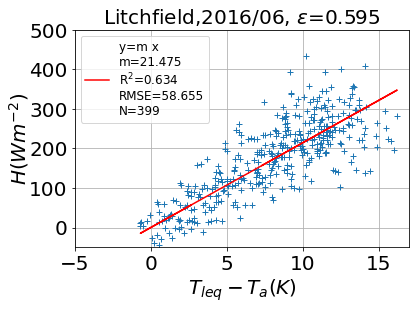

58.65472366271124
59.13100674103406


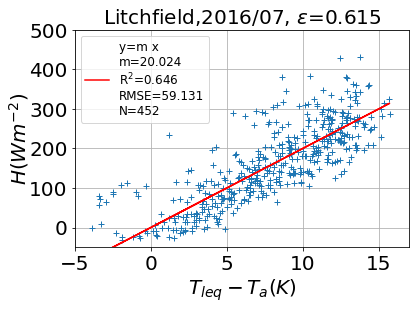

59.13100674103406
65.0083978645278


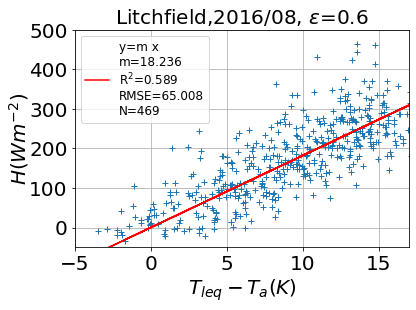

65.0083978645278
59.77627420494292


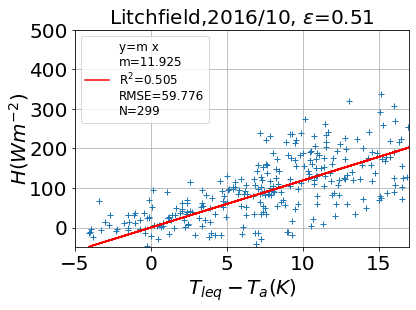

59.77627420494292
47.71747031198173


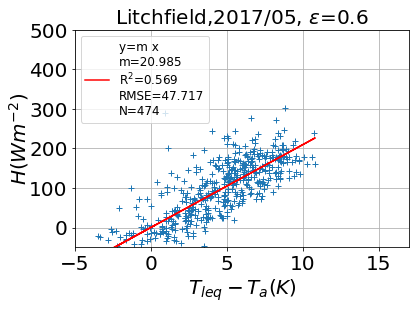

47.71747031198173
47.61572753636992


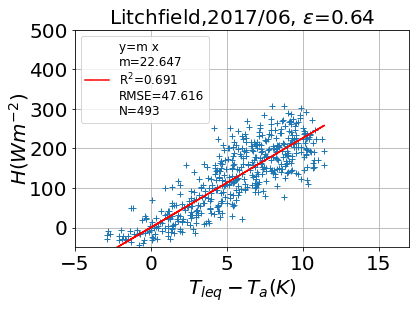

47.61572753636992
64.94831824304978


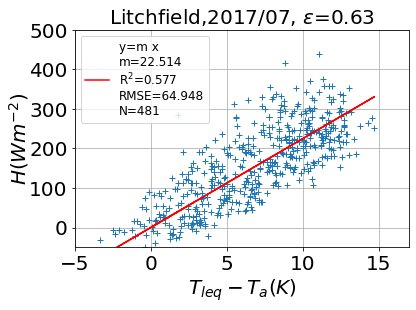

64.94831824304978
64.01009602950155


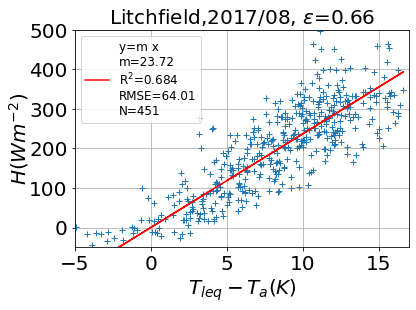

64.01009602950155
78.12454104662355


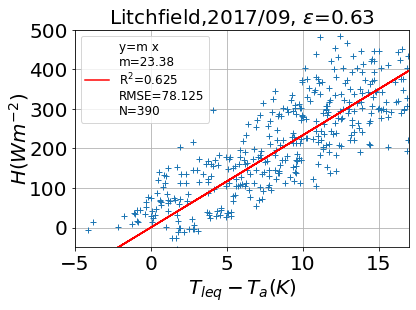

78.12454104662355
63.783830291378905


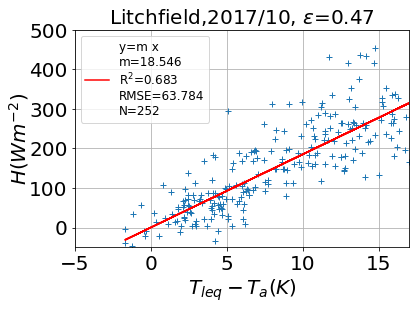

63.783830291378905
56.246114276284054


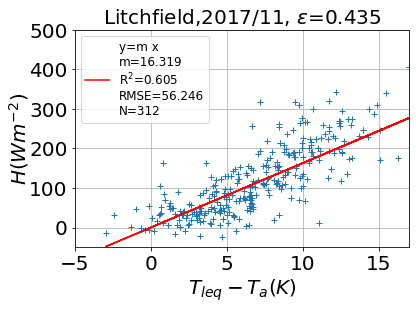

56.246114276284054
65.84930634408296


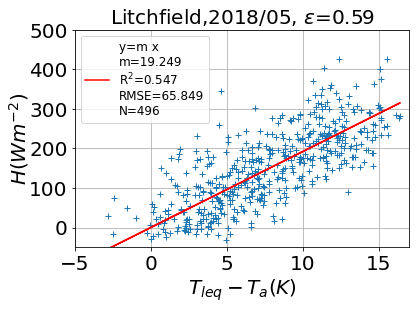

65.84930634408296
60.179055091869856


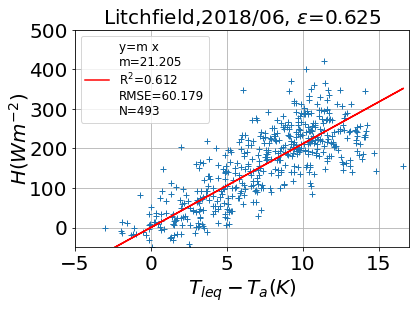

60.179055091869856
58.55158068536415


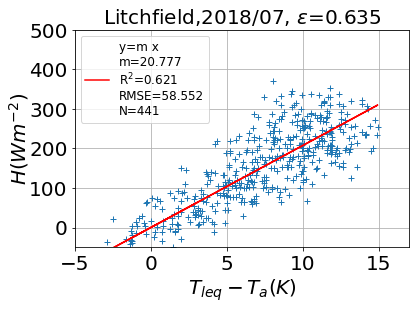

58.55158068536415
60.69882360800608


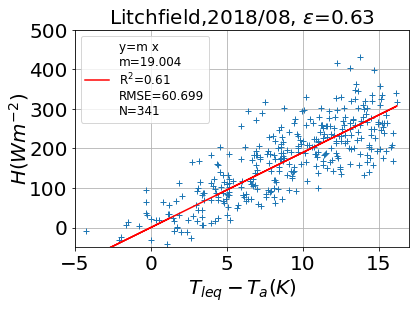

60.69882360800608
62.572626984897774


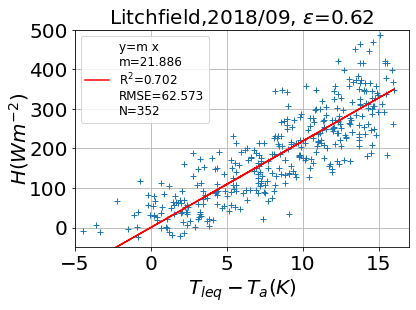

62.572626984897774
62.69767767555519


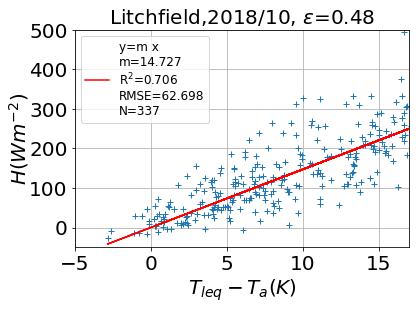

62.69767767555519
49.702115971017754


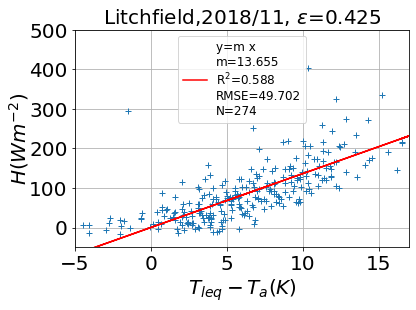

49.702115971017754
40.29588999397038


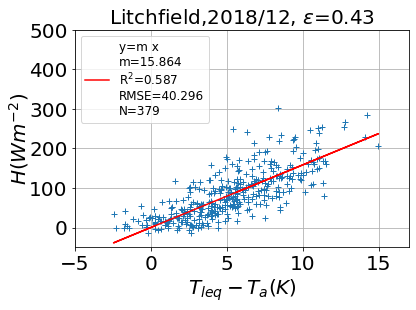

40.29588999397038


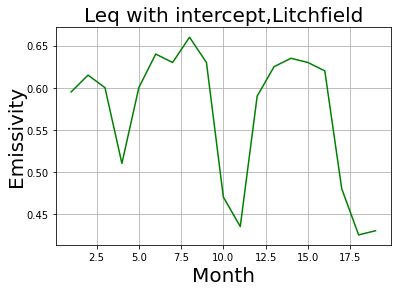

In [45]:
site="Litchfield"
df=lfframe.copy()
mnth=0                              #8,9,10,11,12
eqdigits=3
list_opteps_lf=[]
list_slope_lf=[]
for yr in range(2016,2019):
    
    for i in range(12):
        mnth=i+1
        opteps_sp_ref = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])
        loop_result=opteps_RLM (yr,df,mnth)
        opt_eps=loop_result[0]
        slope=loop_result[1]
        if opt_eps < 1:
            list_opteps_lf.append(opt_eps)
            list_slope_lf.append(slope)
            opteps_monthly(site,yr,df,mnth,opt_eps)
        else:
            list_opteps_lf.append(np.nan)
            list_slope_lf.append(np.nan)

eps_lf=np.array(list_opteps_lf)## converting into array
eps_lf=eps_lf[~np.isnan(eps_lf)]## removing nan
plt.plot(np.arange(len(eps_lf))+1,eps_lf[~np.isnan(eps_lf)],color= 'green')
plt.xlabel('Month', ha='center',fontsize=20)
plt.ylabel('Emissivity', labelpad=10, va='center',fontsize=20)
plottitle =  'Leq with intercept,{0}'.format(str(site))
fname = 'Leq_intercept{0}'.format(str(site))
plt.title(plottitle, fontsize=20)
plt.grid()
#plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')

plt.show()

In [46]:
from matplotlib.ticker import LinearLocator

## Adelaide River:

In [47]:
def opteps_RLM_ar(years, df_all,mnth,xcol = 'DT', ycol = 'Fh', eqdigits=3):
    opteps_sp_ref = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])
    k=0
    epsilon1=np.arange(0.4,1,0.005).tolist() # using array of the epsilon values
    df = df_all[(df_all.index.year == years)& (df_all.index.month == mnth)  & 
                (df_all.Fn > 25) & (df_all.Ws_CSAT > 2)]
    ####
   
    for j in range(len(epsilon1)) :
        tf_T_s = theano_function([R_lin, R_lout], [eq_Ts_Rlout_Rlin.rhs.subs(epsilon, epsilon1[j]).
                                                          subs(Variable.__defaults__)], dims={R_lin:1, R_lout:1})
                                                       
        
        
        tf_T_s2 = theano_function([R_lin, R_lout], [eq_Ts_Rlout_Rlin.rhs.subs(epsilon, epsilon1[j]).
                                                          subs(Variable.__defaults__)], dims={R_lin:1, R_lout:1})
        
        list_T_s = tf_T_s(df.Fld,df.Flu)
        df = df.assign(T_s=list_T_s)
        list_H = df.Fh
        list_DT = df.T_s - df.T_a
        df = df.assign(DT=(df.T_s - df.T_a)) 
        
        try:
            
            df1 = df.dropna(subset=[xcol, ycol])# for removing nan values
            xdata1 = df1[xcol]
            ydata1 = df1[ycol]
            x=np.array(xdata1)
            y=np.array(ydata1)
            x=x.reshape(-1,1)
            y=y.reshape(-1,1)
            reg=LinearRegression().fit(x, y) ## 2d x
        except ValueError:
            r2=0
        else:
            m=float(reg.coef_)
            c= float(reg.intercept_)
            y_pred = m*x+c
            N=len(y)
            MSE= mean_squared_error(y,y_pred)
            RMSE=float(sqrt(MSE))
            r2=r2_score(y,y_pred)
    
        if r2 > 0.5:
            opteps_sp_ref.loc[k]=[RMSE, m, epsilon1[j], r2]
        else:
            opteps_sp_ref.loc[k]=[np.nan, np.nan, 1, r2]
        k=k+1
        
        
        
    df_eps_ref=opteps_sp_ref.copy()
    
    df_eps_ref.sort_values(by=['RMSE'],ascending=True,inplace=True)
    #return df_eps_ref.eps_ref.iloc[0]
    return(df_eps_ref.eps_ref.iloc[0],df_eps_ref.m.iloc[0])
        
            

In [48]:
def opteps_monthly_ar (site,years, df_all,mnth,epsilon1,xcol = 'DT', ycol = 'Fh', eqdigits=3):
    
    #df_all = HWframe.copy()
     # using array of the epsilon values
    df = df_all[(df_all.index.year == years)& (df_all.index.month == mnth)  & 
                (df_all.Fn > 25) & (df_all.Ws_CSAT > 2)]
    ####
    
   
    tf_T_s = theano_function([R_lin, R_lout], [eq_Ts_Rlout_Rlin.rhs.subs(epsilon, epsilon1).
                                                          subs(Variable.__defaults__)], dims={R_lin:1, R_lout:1})
                                                       
        
        
    tf_T_s2 = theano_function([R_lin, R_lout], [eq_Ts_Rlout_Rlin.rhs.subs(epsilon, epsilon1).
                                                          subs(Variable.__defaults__)], dims={R_lin:1, R_lout:1})
        
        
        
    list_T_s = tf_T_s(df.Fld,df.Flu)
    
    df = df.assign(T_s=list_T_s)
    list_H = df.Fh
    list_DT = df.T_s - df.T_a
    df = df.assign(DT=(df.T_s - df.T_a))
        ####
    
        #####
    df1 = df.dropna(subset=[xcol, ycol])# for removing nan values
    xdata1 = df1[xcol]
    ydata1 = df1[ycol]
    x=np.array(xdata1)
    y=np.array(ydata1)
    x=x.reshape(-1,1)
    y=y.reshape(-1,1)
    reg=LinearRegression(fit_intercept=False).fit(x, y) ## 2d x
    m=float(reg.coef_)
    c=float(reg.intercept_)
    y_pred = m*x + c
    
    N=len(y)
    MSE= mean_squared_error(y,y_pred)
    RMSE=float(sqrt(MSE))
    print(RMSE)
    r2=r2_score(y,y_pred)
    legendtext = 'y=m x \nm={0}\n'r'R$^2$={1}''\nRMSE={2}\nN={3}'.format(str(np.round(m,decimals=eqdigits)),
                                                                  str(np.round(r2,decimals=eqdigits)),
                                                                  str(np.round(RMSE, decimals=eqdigits)),
                                                                  str(np.round(N, decimals=eqdigits)))

        
        
        
    plt.plot(x,y,"+",label='_nolegend_')
    plt.xlabel(r'$T_{leq} - T_{a} (K)$', ha='center',fontsize=20)
    plt.ylabel(r'$H (W m^{-2})$', labelpad=10, va='center',fontsize=20)
    plt.title('{0},{1}, $\epsilon$={2}'.format(str(site),df.index[0].date().strftime('%Y/%m'), 
                                          str(np.round(epsilon1,decimals=3))),fontsize=20)
    #plt.rc('xtick',labelsize=14)
    #plt.rc('ytick',labelsize=14)
    plt.xticks([-5,0,5,10,15],fontsize=20)
    plt.xlim(-5, 17)
    plt.ylim(-50, 500)
    plt.plot(x,y_pred, color='red',label=legendtext)# predicted
    plt.legend(loc="best",fontsize=12)
    plt.grid()
    plt.show()
    
        
    

48.856589793271766


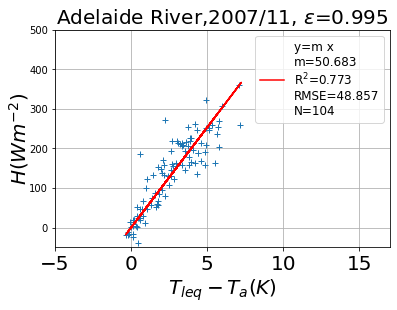

41.11582390208781


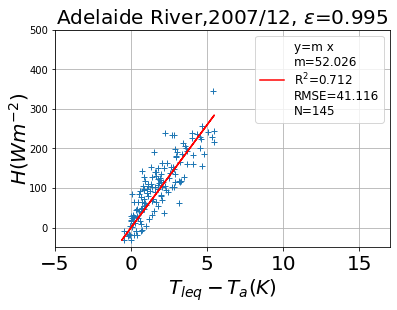

44.04854719179843


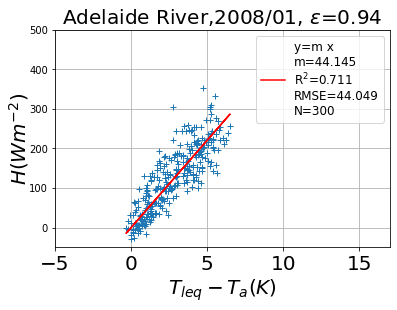

41.72074418446643


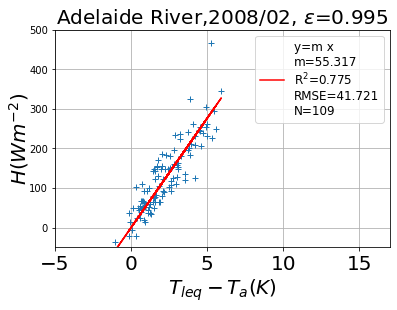

49.64111428501377


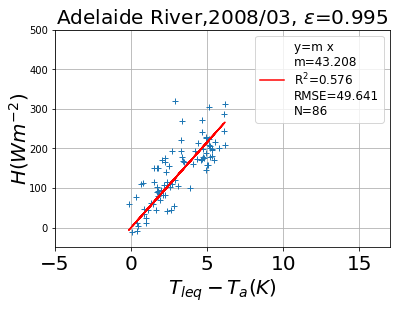

40.67262766379182


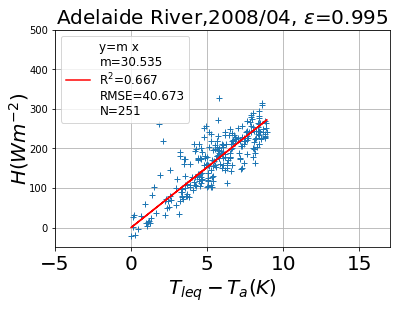

41.2795258535719


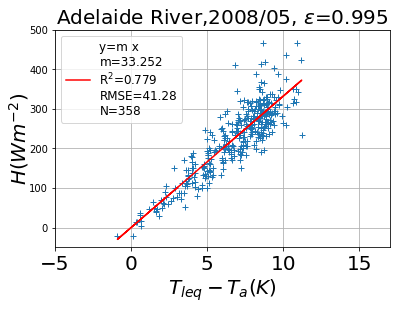

36.84352456196778


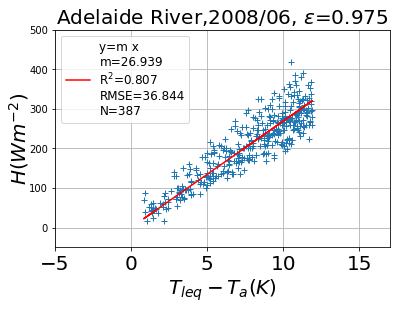

47.00567049420867


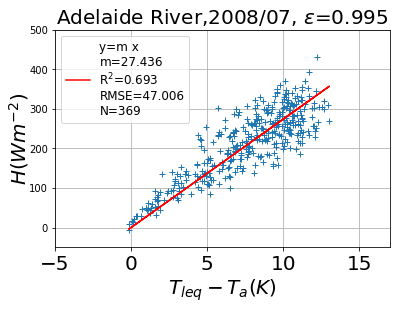

44.92855453188485


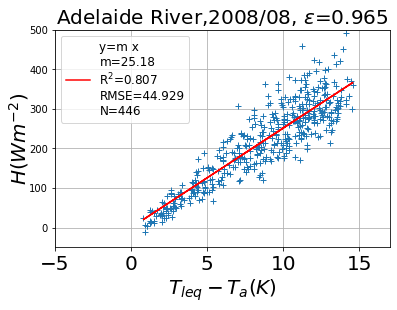

48.7514019098446


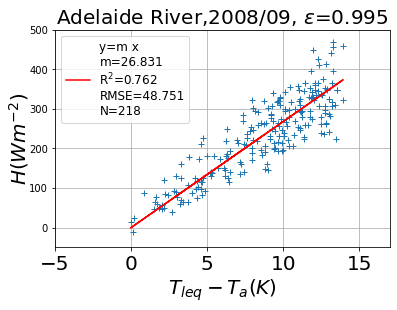

41.76604992180728


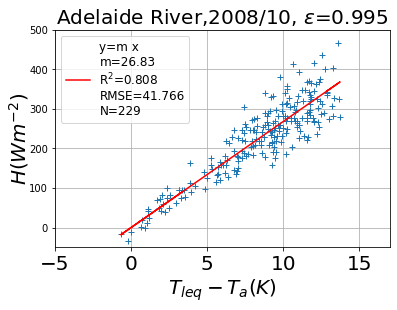

38.785697516388915


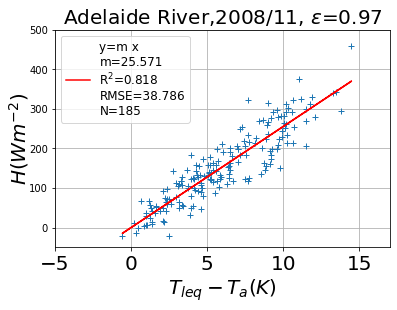

29.747672291442317


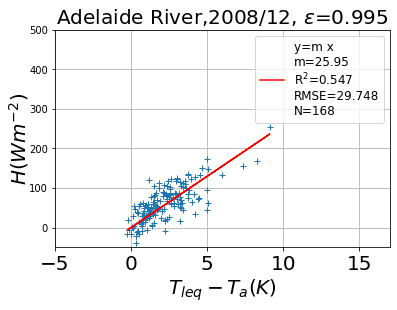

30.310311056404675


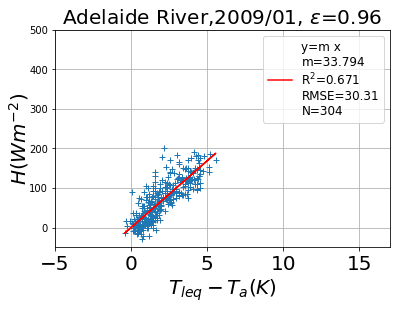

31.809424593548005


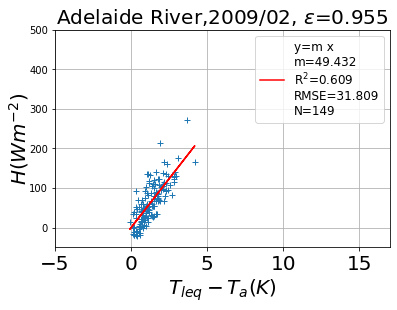

42.52015905043884


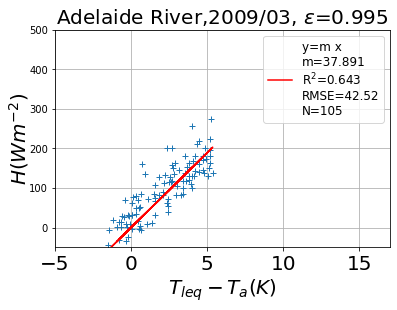

50.92773513751154


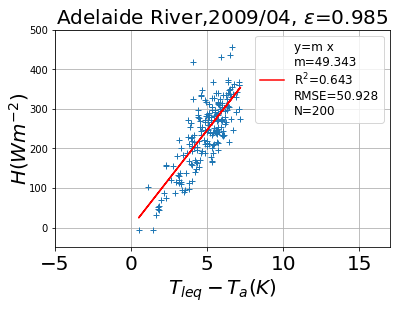

50.43491062869417


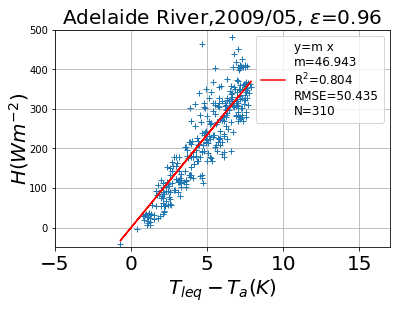

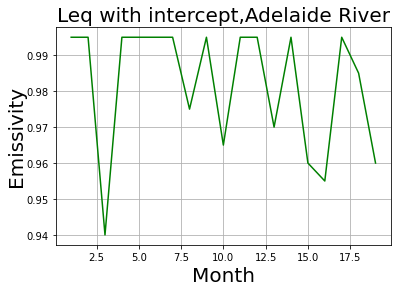

In [49]:
site="Adelaide River"
df=arframe.copy()
mnth=0                              #8,9,10,11,12
eqdigits=3
list_opteps_ar=[]
list_slope_ar=[]
for yr in range(2007,2010):
    
    for i in range(12):
        mnth=i+1
        opteps_sp_ref = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])
        loop_result=opteps_RLM_ar (yr,df,mnth)
        opt_eps=loop_result[0]
        slope=loop_result[1]
        if opt_eps < 1:
            list_opteps_ar.append(opt_eps)
            list_slope_ar.append(slope)
            opteps_monthly_ar(site,yr,df,mnth,opt_eps)
        else:
            list_opteps_ar.append(np.nan)
            list_slope_ar.append(np.nan)

eps_ar=np.array(list_opteps_ar)## converting into array
eps_ar=eps_ar[~np.isnan(eps_ar)]## removing nan
plt.plot(np.arange(len(eps_ar))+1,eps_ar[~np.isnan(eps_ar)],color= 'green')
plt.xlabel('Month', ha='center',fontsize=20)
plt.ylabel('Emissivity', labelpad=10, va='center',fontsize=20)
plottitle =  'Leq with intercept,{0}'.format(str(site))
fname = 'Leq_intercept{0}'.format(str(site))
plt.title(plottitle, fontsize=20)
plt.grid()
#plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')

plt.show()

# Holmes sites: brookings and Yatir

## Brookings:

In [50]:
filename = '/home/thakur_21505/Documents/git_projects/aerodynamic_conductances/jupyter/leonardo_conference/US_Brook/AMF_US-Bkg_BASE_HH_4-1.csv'
brookframe = pd.read_csv(filename, error_bad_lines=False,  na_values=-9999, skiprows= 2)
   

In [51]:
brookframerang = pd.date_range('1/1/2004 00:00', periods=len(brookframe.index), freq='30min')
brookframe.index = brookframerang
brookframe=brookframe.replace(-9999.000000, np.nan)
brookframe["T_a"] = pd.Series(brookframe.TA + 273.15, index=brookframe.index)
#brookframe

## Yatir:

In [52]:
filename = '../Data/fluxnet/808983895/EFDC_L2_Flx_ILYat_2005_v03_30m.txt'

yatframe = pd.read_csv(filename, error_bad_lines=False,  na_values=-9999)
                      


In [53]:
yatframerang = pd.date_range('1/1/2005 00:00', periods=len(yatframe.index), freq='30min')
yatframe.index = yatframerang
yatframe=yatframe.replace(-9999.000000, np.nan)
yatframe["T_a"] = pd.Series(yatframe.TA + 273.15, index=yatframe.index)

In [54]:


def opteps_OLS_holmes (site,years, df_all,mnth,xcol = 'DT', ycol = 'H', eqdigits=3):
    
    opteps_brook_ref = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])

    k=0
    epsilon1=np.arange(0.4,1,0.005).tolist() # using array of the epsilon values
    df = df_all[(df_all.index.year == years)& (df_all.index.month == mnth)  & 
                (df_all.NETRAD > 25) & (df_all.WS > 2)]
    ####
    df12 = df_all[(df_all.index.year == years) & (df_all.index.month == mnth) & ((df_all.NETRAD > 25) | (df_all.WS < 2))]
    
    for j in range(len(epsilon1)) :
        tf_T_s = theano_function([R_lin, R_lout], [eq_Ts_Rlout_Rlin.rhs.subs(epsilon, epsilon1[j]).
                                                          subs(Variable.__defaults__)], dims={R_lin:1, R_lout:1})
                                                       
        
        
        tf_T_s2 = theano_function([R_lin, R_lout], [eq_Ts_Rlout_Rlin.rhs.subs(epsilon, epsilon1[j]).
                                                          subs(Variable.__defaults__)], dims={R_lin:1, R_lout:1})
        
        
        
        list_T_s = tf_T_s(df.LW_IN,df.LW_OUT)
        list_T_s2 = tf_T_s2(df12.LW_IN,df12.LW_OUT)
        df = df.assign(T_s=list_T_s)
        list_H = df.H
        list_DT = df.T_s - df.T_a
        df = df.assign(DT=(df.T_s - df.T_a))
        ####
        df12 = df12.assign(T_s2=list_T_s2)
        list_DT2 = df12.T_s2 - df12.T_a
        df12 = df12.assign(DT2=(df12.T_s2 - df12.T_a))####
        #####
        try:
            df1 = df.dropna(subset=[xcol, ycol])# for removing nan values
            xdata1 = df1[xcol]
            ydata1 = df1[ycol]
            x=np.array(xdata1)
            y=np.array(ydata1)
            x=x.reshape(-1,1)
            y=y.reshape(-1,1)
            reg=LinearRegression(fit_intercept=False).fit(x, y) ## 2d x
        except ValueError:
            r2=0
        else:
            m=float(reg.coef_)
            y_pred = m*x
            N=len(y)
            MSE= mean_squared_error(y,y_pred)
            RMSE=float(sqrt(MSE))
            r2=r2_score(y,y_pred)
    
        if r2 > 0.5:
            opteps_brook_ref.loc[k]=[RMSE, m, epsilon1[j], r2]
        else:
            opteps_brook_ref.loc[k]=[np.nan, np.nan, 1, r2]   
            #print(opt_eps_RMSE_brook)
        k=k+1
    df_eps_ref=opteps_brook_ref.copy()
    
    df_eps_ref.sort_values(by=['RMSE'],ascending=True,inplace=True)
    #print(df_eps_ref)
    return(df_eps_ref.eps_ref.iloc[0],df_eps_ref.m.iloc[0])
#opteps_OLS_loop2(2005,Asframe,8)             

In [55]:
def opteps_holmes_months (site,years, df_all,mnth,epsilon1,xcol = 'DT', ycol = 'H', eqdigits=3):
    
    
     # using array of the epsilon values
    df = df_all[(df_all.index.year == years)& (df_all.index.month == mnth)  & (df_all.NETRAD > 25) & (df_all.WS > 2)]
    ####
    df12 = df_all[(df_all.index.year == years) & (df_all.index.month == mnth) & ((df_all.NETRAD <25) | (df_all.WS < 2))]
    
   
    tf_T_s = theano_function([R_lin, R_lout], [eq_Ts_Rlout_Rlin.rhs.subs(epsilon, epsilon1).
                                                          subs(Variable.__defaults__)], dims={R_lin:1, R_lout:1})
                                                       
        
        
    tf_T_s2 = theano_function([R_lin, R_lout], [eq_Ts_Rlout_Rlin.rhs.subs(epsilon, epsilon1).
                                                          subs(Variable.__defaults__)], dims={R_lin:1, R_lout:1})
        
        
        
    list_T_s = tf_T_s(df.LW_IN,df.LW_OUT)
    list_T_s2 = tf_T_s2(df12.LW_IN,df12.LW_OUT)
    df = df.assign(T_s=list_T_s)
    list_H = df.H
    list_DT = df.T_s - df.T_a
    df = df.assign(DT=(df.T_s - df.T_a))
        ####
    df12 = df12.assign(T_s2=list_T_s2)
    list_DT2 = df12.T_s2 - df12.T_a
    df12 = df12.assign(DT2=(df12.T_s2 - df12.T_a))####
        #####
    df1 = df.dropna(subset=[xcol, ycol])# for removing nan values
    xdata1 = df1[xcol]
    ydata1 = df1[ycol]
    
    x=np.array(xdata1)
    y=np.array(ydata1)
    x=x.reshape(-1,1)
    y=y.reshape(-1,1)
    reg=LinearRegression(fit_intercept=False).fit(x, y) ## 2d x
    m=float(reg.coef_.flatten())
    y_pred = m*x
    MSE= mean_squared_error(y,y_pred)
    RMSE=float(sqrt(MSE))
    N=len(y)
    rss=sum((y-y_pred)**2)
    tss=sum((y-np.mean(y_pred))**2)
    r2=r2_score(y,y_pred)
    legendtext = 'y=m x \nm={0}\n'r'R$^2$={1}''\nRMSE={2}\nN={3}'.format(str(np.round(m,decimals=eqdigits)),
                                                                 str(np.round(r2,decimals=eqdigits)),
                                                                 str(np.round(RMSE,decimals=eqdigits)),
                                                                 str(np.round(N, decimals=eqdigits)))

        
        
    plt.plot(x,y,"+",label='_nolegend_')#.format(list_months))
    plt.plot(df12.DT2,df12.H,".k",label='_nolegend_')
    plt.xlabel(r'$T_{leq} - T_a (K)$', ha='center',fontsize=20)
    plt.ylabel('H (W m$^{-2}$)', labelpad=10, va='center',fontsize=20)
    plt.title('{0},{1}, $\epsilon$={2}'.format(str(site),df.index[0].date().strftime('%Y/%m'), 
                                          str(np.round(epsilon1,decimals=3))),fontsize=20)
    plt.rc('xtick',labelsize=14)
    plt.rc('ytick',labelsize=14)
    plt.xticks([-5,0,5,10])
       
    plt.xlim(-5, 10)
    plt.ylim(-100, 500)
    #plt.grid()
    
        
        
    plt.plot(x,y_pred, color='red',label=legendtext)# predicted
    plt.legend(loc="upper right")
    
    plottitle = 'Brookings, {0},'.format(str(df.index[0].date().strftime('%Y/%m'))) +' $\epsilon_{opt}$ = '+'{0}'.format(str(np.round(epsilon1,decimals=3)))
    
    fname = 'Brookings_le_{0}'.format(df.index[0].date().strftime('%Y-%m'))
    plt.title(plottitle)
    plt.grid()

    plt.savefig(plt_path+fname+'.png',bbox_inches = 'tight',facecolor='w', edgecolor='w', orientation='portrait')
    plt.show()
        
    
    print(RMSE) 
        
    

## brook

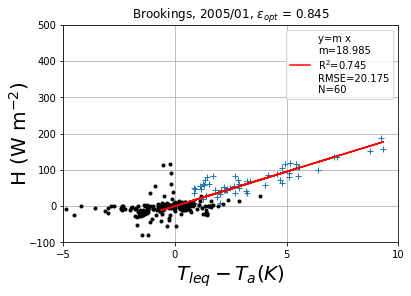

20.174703223483903


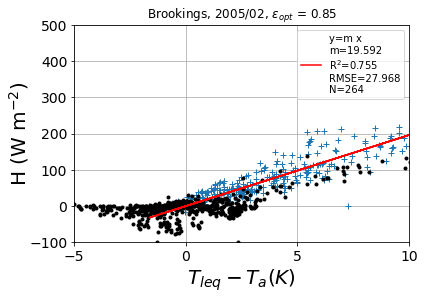

27.967756805118473


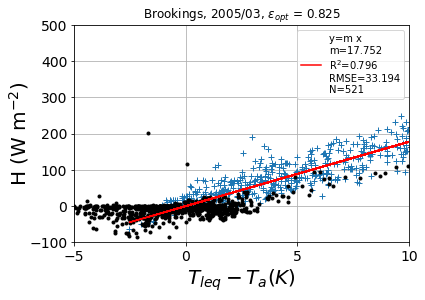

33.194235632129946


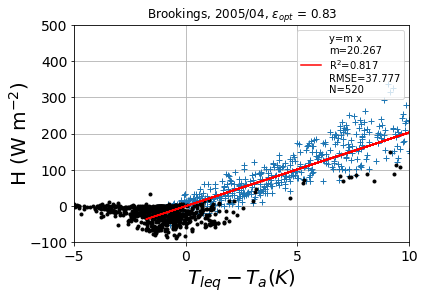

37.77695640398094


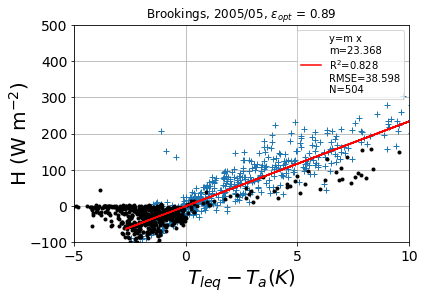

38.59820404502622


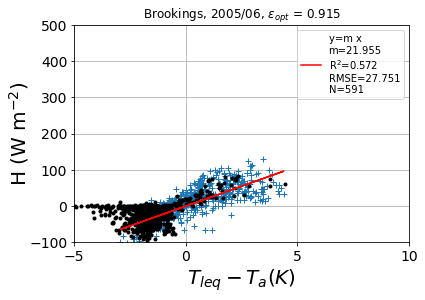

27.750916090220656


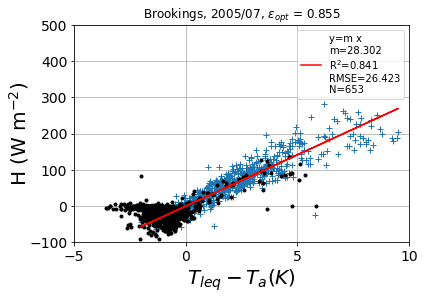

26.422761573904396


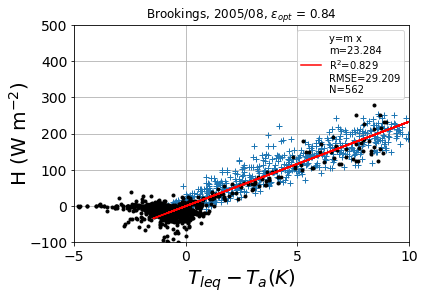

29.208913178115566


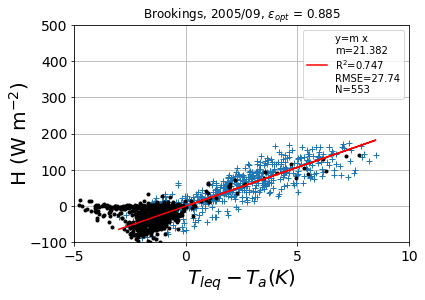

27.739569095284782


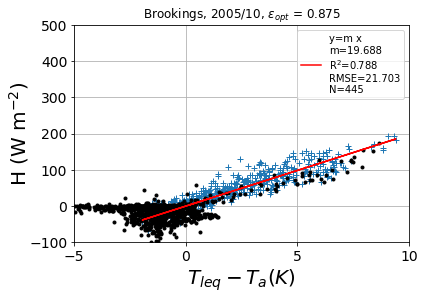

21.702566851157865


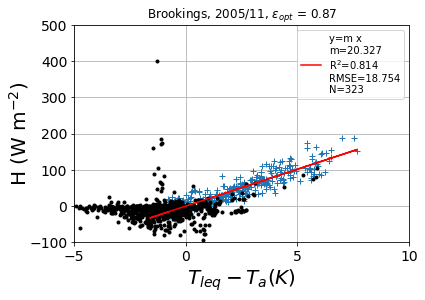

18.754280421792817


NameError: name 'eps_br' is not defined

In [56]:
site="Brookings"
df=brookframe.copy()
mnth=0                              #8,9,10,11,12
eqdigits=3
list_opteps_br=[]
list_slope_br=[]
for yr in range(2005,2006):
    
    for i in range(12):
        mnth=i+1
        opteps_brook_ref = pd.DataFrame(columns=["RMSE", "m","eps_ref","R2"])
        loop_result= opteps_OLS_holmes(site,yr,df,mnth)
        opt_eps=loop_result[0]
        slope=loop_result[1]
        if opt_eps < 1:
            list_opteps_br.append(opt_eps)
            list_slope_br.append(slope)
            opteps_holmes_months(site,yr,df,mnth,opt_eps)
        else:
            list_opteps_br.append(np.nan)
            list_slope_br.append(np.nan)

eps_ar=np.array(list_opteps_br)## converting into array
eps_ar=eps_ar[~np.isnan(eps_br)]## removing nan
plt.plot(np.arange(len(eps_br))+1,eps_br[~np.isnan(eps_br)],color= 'green')
plt.xlabel('Month', ha='center',fontsize=20)
plt.ylabel('Emissivity', labelpad=10, va='center',fontsize=20)
plottitle =  'Leq with intercept,{0}'.format(str(site))
fname = 'Leq_intercept{0}'.format(str(site))
plt.title(plottitle, fontsize=20)
plt.grid()
#plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')

plt.show()

# Ignoring reflected longwave:

In [ ]:
def opteps_OLS_loop_1 (years, df_all,mnth,xcol = 'DT1', ycol = 'Fh',
                       epsmin=0.7, epsmax=0.999, epsincr=0.002, eqdigits=3):
    
    opteps_As = pd.DataFrame(columns=["RMSE", "m","eps","R2"])
    k=0
    epsilon1=np.arange(epsmin, epsmax, epsincr).tolist() # using array of the epsilon values
    df = df_all[(df_all.index.year == years)& (df_all.index.month == mnth)  & (df_all.Fn > 25) & (df_all.Ws > 2)
         &(df_all.Fld_QCFlag==00)&(df_all.Flu_QCFlag==00)
                &(df_all.Ta_QCFlag==00)&(df_all.Fh_QCFlag==00)]
    ####
    df12 = df_all[(df_all.index.year == years) & (df_all.index.month == mnth) & ((df_all.Fn <25) | (df_all.Ws < 2))]
    
    for j in range(len(epsilon1)) :
        tf_T_s1 = theano_function([R_lout], [eq_Ts_Rlout.rhs.subs(epsilon, epsilon1[j]).
                                                          subs(Variable.__defaults__)], dims={R_lout:1})
        
        tf_T_s12 = theano_function([R_lout], [eq_Ts_Rlout.rhs.subs(epsilon, epsilon1[j]).
                                                          subs(Variable.__defaults__)], dims={R_lout:1})
        list_T_s1 = tf_T_s1(df.Flu)
        df = df.assign(T_s1=list_T_s1)
        ##########
        list_T_s12 = tf_T_s12(df12.Flu)
        df12 = df12.assign(T_s12=list_T_s12)
        list_H = df.Fh
        list_DT1 = df.T_s1 - df.T_a
        df = df.assign(DT1=(df.T_s1 - df.T_a))
        list_DT12 = df12.T_s12 - df12.T_a
        df12 = df12.assign(DT12=(df12.T_s12 - df12.T_a))
        ###########
        df1 = df.dropna(subset=[xcol, ycol])# for removing nan values
        xdata1 = df1[xcol]
        ydata1 = df1[ycol]
        x=np.array(xdata1)
        y=np.array(ydata1)
        x=x.reshape(-1,1)
        y=y.reshape(-1,1)
        reg=LinearRegression(fit_intercept=False).fit(x, y) ## 2d x
        m=float(reg.coef_)
        y_pred = m*x
        N=len(y)
        MSE= mean_squared_error(y,y_pred)
        RMSE=float(sqrt(MSE))
        r2=r2_score(y,y_pred)
        if r2 > 0.5:
                 opteps_As.loc[k]=[RMSE, m, epsilon1[j], r2]
        else:
            opteps_As.loc[k]=[np.nan, np.nan, np.nan, r2]   
            
        k=k+1
        
    
    df_eps= opteps_As.copy()
    
    df_eps.sort_values(by=['RMSE'],ascending=True,inplace=True)
    
    return df_eps.eps.iloc[0]
        
       

In [ ]:
def opteps_OLS_months (years, df_all,mnth,epsilon1,xcol = 'DT1', ycol = 'Fh' , eqdigits=3):
    """Plot a panel per month with H and delT."""
    
    
     # using array of the epsilon values
    df = df_all[(df_all.index.year == years)& (df_all.index.month == mnth)&(df_all.Fn > 25) & (df_all.Ws > 2)
         &(df_all.Fld_QCFlag==00)&(df_all.Flu_QCFlag==00)
                &(df_all.Ta_QCFlag==00)&(df_all.Fh_QCFlag==00)]
    
    ####
    df12 = df_all[(df_all.index.year == years) & (df_all.index.month == mnth) & ((df_all.Fn <25) | (df_all.Ws < 2))]
    
    tf_T_s1 = theano_function([R_lout], [eq_Ts_Rlout.rhs.subs(epsilon, epsilon1).
                                                          subs(Variable.__defaults__)], dims={R_lout:1})
        
    tf_T_s12 = theano_function([R_lout], [eq_Ts_Rlout.rhs.subs(epsilon, epsilon1).
                                                          subs(Variable.__defaults__)], dims={R_lout:1})
    list_T_s1 = tf_T_s1(df.Flu)
    df = df.assign(T_s1=list_T_s1)
        ##########
    list_T_s12 = tf_T_s12(df12.Flu)
    df12 = df12.assign(T_s12=list_T_s12)
    list_H = df.Fh
    list_DT1 = df.T_s1 - df.T_a
    df = df.assign(DT1=(df.T_s1 - df.T_a))
    list_DT12 = df12.T_s12 - df12.T_a
    df12 = df12.assign(DT12=(df12.T_s12 - df12.T_a))
        ###########
    df1 = df.dropna(subset=[xcol, ycol])# for removing nan values
    xdata1 = df1[xcol]
    ydata1 = df1[ycol]
    x=np.array(xdata1)
    y=np.array(ydata1)
    x=x.reshape(-1,1)
    y=y.reshape(-1,1)
    reg=LinearRegression(fit_intercept=False).fit(x, y) ## 2d x
    m=float(reg.coef_)
    y_pred = m*x
    
    N=len(y)
    MSE= mean_squared_error(y,y_pred)
    RMSE=float(sqrt(MSE))
    print(RMSE)
    r2=r2_score(y,y_pred)
    legendtext = 'y=m x \nm={0}\n'r'R$^2$={1}''\nRMSE={2}\nN={3}'.format(str(np.round(m,decimals=eqdigits)),
                                                                 str(np.round(r2,decimals=eqdigits)),
                                                                 str(np.round(RMSE, decimals=eqdigits)),
                                                                 str(np.round(N, decimals=eqdigits)))

        
       
    plt.plot(x,y,"+",label='_nolegend_')#.format(list_months))#.format(list_months))
    
    plt.xlabel(r'$T_{seq} - T_{a} (K)$', ha='center',fontsize=20)
    plt.ylabel(r'$H(W m^{-2})$', labelpad=10, va='center',fontsize=20)
    plt.title('Alice Spring,{0}, $\epsilon$={1}'.format(df.index[0].date().strftime('%Y/%m'), 
                                          str(np.round(epsilon1,decimals=3))))
        
    
        
    plt.xticks([-5,0,5,10,15])
    plt.xlim(0, 15)
    plt.ylim(0, 500)
    plt.plot(x,y_pred, color='red',label=legendtext)# predicted
    plt.legend(loc="upper left")
    plt.grid()
    plt.show()
        
        

## Monthly plots:

In [ ]:
yr=2016
mnth=0
list_opt_epsign=[]
for i in range(12):
    #opt_eps_RMSE_brook = pd.DataFrame(columns=["RMSE", "m","eps","R2"])
    mnth=i+1
    opteps_As = pd.DataFrame(columns=["RMSE", "m","eps","R2"])
    opt_eps=  opteps_OLS_loop_1(yr, HWframe,mnth)
    
    if opt_eps<1:
        list_opt_epsign.append(opt_eps)
        opteps_OLS_months(yr, HWframe,mnth,opt_eps)
       
    else:
        list_opt_epsign.append(1)
    

### Yatir and Brooking

In [ ]:

def opteps_OLS_loop_1 (df_all,years, mnth, xcol = 'DT1', ycol = 'H', epsmin=0.7, epsmax=1, epsincr=0.005, 
           eqdigits=3,print_summary=True):
    """Plot  month with H and delT for Fluxnet site (Holmes et al .2009)"""
    opt_eps_RMSE_brook = pd.DataFrame(columns=["RMSE", "m","eps","R2"])
    k=0
   
    epsilon1=np.arange(epsmin, epsmax, epsincr).tolist() # using array of the epsilon values

    df = df_all[(df_all.index.year == years)&(df_all.index.month == mnth)&(df_all.NETRAD > 25) 
                & (df_all.WS > 2)]
    ##  black dots in fig:
    df12 = df_all[(df_all.index.year == years) & (df_all.index.month == mnth) & ((df_all.NETRAD <25) | (df_all.WS < 2))]
    
    for j in range(len(epsilon1)) :
        tf_T_s1 = theano_function([R_lout], [eq_Ts_Rlout.rhs.subs(epsilon, epsilon1[j]).
                                                          subs(Variable.__defaults__)], dims={R_lout:1})
        
        tf_T_s12 = theano_function([R_lout], [eq_Ts_Rlout.rhs.subs(epsilon, epsilon1[j]).
                                                          subs(Variable.__defaults__)], dims={R_lout:1})
        list_T_s1 = tf_T_s1(df.LW_OUT)
        df = df.assign(T_s1=list_T_s1)
        ##########
        list_T_s12 = tf_T_s12(df12.LW_OUT)
        df12 = df12.assign(T_s12=list_T_s12)
        list_DT12 = df12.T_s12 - df12.T_a
        df12 = df12.assign(DT12=(df12.T_s12 - df12.T_a))
        list_H = df.H
        list_DT1 = df.T_s1 - df.T_a
        df = df.assign(DT1=(df.T_s1 - df.T_a))
        
        ###########
        try:
            df1 = df.dropna(subset=[xcol, ycol])# for removing nan values
            xdata1 = df1[xcol]
            ydata1 = df1[ycol]
            x=np.array(xdata1)
            y=np.array(ydata1)
            x=x.reshape(-1,1)
            y=y.reshape(-1,1)
            reg=LinearRegression(fit_intercept=False).fit(x, y) ## 2d x
        except ValueError:
            r2=0
        else:
            m=float(reg.coef_)
            y_pred = m*x
            N=len(y)
            MSE= mean_squared_error(y,y_pred)
            RMSE=float(sqrt(MSE))
            r2=r2_score(y,y_pred)
    
        if r2 > 0.5:
            opt_eps_RMSE_brook.loc[k]=[RMSE, m, epsilon1[j], r2]
        else:
            opt_eps_RMSE_brook.loc[k]=[RMSE, m, np.nan, r2]   
            
        k=k+1
    df_eps=opt_eps_RMSE_brook.copy()
    
    df_eps.sort_values(by=['RMSE'],ascending=True,inplace=True)
    
    
    return df_eps,df_eps.eps.iloc[0]
        
       

## opt eps plot for each month:

In [ ]:
def opteps_OLS_months ( df_all,years, mnth,epsilon1,xcol = 'DT1', ycol = 'H', ymin=-5, ymax=700, xmin=-5, xmax=20, 
           eqdigits=3,print_summary=True):
    """Plot a panel per month with H and delT."""
    
    #df_all = Asframe.copy()
    df = df_all[(df_all.index.year == years)& (df_all.index.month == mnth)  & (df_all.NETRAD > 25) & (df_all.WS > 2)]
    ##  black dots in fig:
    df12 = df_all[(df_all.index.year == years) & (df_all.index.month == mnth) & ((df_all.NETRAD <25) | (df_all.WS < 2))]
    
    tf_T_s1 = theano_function([R_lout], [eq_Ts_Rlout.rhs.subs(epsilon, epsilon1).
                                                          subs(Variable.__defaults__)], dims={R_lout:1})
        
    tf_T_s12 = theano_function([R_lout], [eq_Ts_Rlout.rhs.subs(epsilon, epsilon1).
                                                          subs(Variable.__defaults__)], dims={R_lout:1})
    list_T_s1 = tf_T_s1(df.LW_OUT)
    df = df.assign(T_s1=list_T_s1)
        ##########
    list_T_s12 = tf_T_s12(df12.LW_OUT)
    df12 = df12.assign(T_s12=list_T_s12)
    list_H = df.H
    list_DT1 = df.T_s1 - df.T_a
    df = df.assign(DT1=(df.T_s1 - df.T_a))
    list_DT12 = df12.T_s12 - df12.T_a
    df12 = df12.assign(DT12=(df12.T_s12 - df12.T_a))
        ###########
    df1 = df.dropna(subset=[xcol, ycol])# for removing nan values
    xdata1 = df1[xcol]
    ydata1 = df1[ycol]
    x=np.array(xdata1)
    y=np.array(ydata1)
    x=x.reshape(-1,1)
    y=y.reshape(-1,1)
    reg=LinearRegression(fit_intercept=False).fit(x, y) ## 2d x
    m=float(reg.coef_)
    y_pred = m*x
    
    N=len(y)
    MSE= mean_squared_error(y,y_pred)
    RMSE=float(sqrt(MSE))
    print(RMSE)
    r2=r2_score(y,y_pred)
    legendtext = 'y=m x \nm={0}\n'r'R$^2$={1}''\nRMSE={2}\nN={3}'.format(str(np.round(m,decimals=eqdigits)),
                                                                 str(np.round(r2,decimals=eqdigits)),
                                                                 str(np.round(RMSE, decimals=eqdigits)),
                                                                 str(np.round(N, decimals=eqdigits)))

        
       
    plt.plot(df.DT1,list_H,"+",label='_nolegend_')#.format(list_months))
    plt.plot(df12.DT12,df12.H,".k",label='_nolegend_')
    plt.xlabel(r'$T_{seq} - T_a (K)$', ha='center',fontsize=20)
    plt.ylabel('H (W m$^{-2}$)', labelpad=10, va='center',fontsize=20)
    plt.xticks([-5,0,5,10],fontsize=20)
       
    plt.xlim(-5, 10)
    plt.ylim(-100, 500)
    plt.plot(x,y_pred, color='red',label=legendtext)# predicted
    plt.legend(loc="upper right")
    
    plottitle = 'Brookings, {0},'.format(str(df.index[0].date().strftime('%Y/%m'))) +' $\epsilon_{opt}$ = '+'{0}'.format(str(np.round(epsilon1,decimals=3)))
    
    fname = 'Brookings_se_{0}'.format(df.index[0].date().strftime('%Y-%m'))
    plt.title(plottitle,fontsize=20)
    plt.grid()

    #plt.savefig(plt_path+fname+'.png',bbox_inches = 'tight',facecolor='w', edgecolor='w', orientation='portrait')
    plt.show()
        
        

In [ ]:
yr=2005
mnth=0
eqdigits=3
list_opt_eps=[]
for i in range(12):
    mnth=i+1
    opt_eps_RMSE_brook = pd.DataFrame(columns=["RMSE", "m","eps","R2"])
    opt_eps1=opteps_OLS_loop_1(Asframe,yr,mnth)[1]
    print(opt_eps1)
    
    if opt_eps1<1:
        list_opt_eps.append(opt_eps1)
        opteps_OLS_months(Asframe,yr,mnth,opt_eps1)
    else:
        list_opt_eps.append(1)
const=np.mean(list_opt_eps)        
plt.plot(np.arange(len(list_opt_eps))+1,list_opt_eps, ".k")
plt.axhspan(const-0.0001,const+0.0001,color='b',alpha=0.9, lw=1.2,ls='dotted')
plt.text(8,0.985, "avg eps =" + str(np.round(const,decimals=eqdigits)))
plt.xlabel('Month', ha='center',fontsize=20)
plt.ylabel('Emissivity', labelpad=10, va='center',fontsize=20)
plt.ylim(0.95,1)
plottitle = '{0},Brookings,seq'.format(str(np.round(yr)))
fname = 'Brookings,{0}'.format(str(np.round(yr)))
plt.title(plottitle)
#plt.grid()
plt.tight_layout()
plt.savefig(plt_path+fname+'.png',facecolor='w', edgecolor='w', orientation='portrait')
####